<a href="https://colab.research.google.com/github/aadrita01/Fundamentals-of-Data-Science/blob/main/Retail_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

#Retail in (Great) Detail

In [ ]:
from datetime import datetime
import pytz
print('ॐ श्री सरस्वत्यै नमः',datetime.now(pytz.timezone('Asia/Calcutta')))
!python --version
!lsb_release -a

ॐ श्री सरस्वत्यै नमः 2025-10-29 07:11:19.499382+05:30
Python 3.12.12
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


# Analysis of Retail Sales Data
In this Colab Notebook, we demonstrate the usage of basic Pandas functions to explore data in a relative large dataset available with [Kaggle](https://www.kaggle.com/datasets/laibaanwer/superstore-sales-dataset?resource=download)<br>

This is  [Exercise # 1](https://pymanager.blogspot.com/p/superstore-sales-analysis.html) used in the textbook [Python for Business Managers](https://pymanager.blogspot.com/p/welcome.html).


In [ ]:
#
# The first step is to import the all-important pandas module
#
import pandas as pd

#
# Alternatively, one can install and import fireducks
# This is supposed to be 100x faster!
#
#!pip install fireducks
#import fireducks.pandas as pd
#
# but NOT BOTH

pd.to_datetime("today").strftime("%d %B %Y")      # get today's date and format it as required
                                                  # other formats https://www.geeksforgeeks.org/python-strftime-function/

'29 October 2025'

# Data Acquisition

In [ ]:
#
# the data is available in both CSV format as well as XLSX format
# prior conversion to XLSX format, if possible, makes the analysis easier because Excel handles many of the data conversion from string to date etc
# however, we will demonstrate the usage of the CSV format because it is more likely to be found in real world situation
#
dataURL1 = 'https://github.com/Praxis-QR/PythonForManagers/raw/main/Data/SuperStoreSalesKaggle.zip'   # zipped CSV file
dataURL2 = 'https://github.com/Praxis-QR/PythonForManagers/raw/main/Data/KaggleRetailSales.xlsx'      # xlsx file
df = pd.read_csv(dataURL1)                              # Pandas can read a zipped, CSV file from a remote location
#df = pd.read_excel(dataURL2)                             # Can also read the corresponding excel file .xlsx
df.shape                                           # Each row in this dataset represents data about ONE sale transaction

(51290, 21)

In [ ]:
df.head(3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011


In [ ]:
df.tail(3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


In [ ]:
#ReqdCols = ['order_id', 'customer_name']
#df[ReqdCols].head(3)


#First Look at Data

In [ ]:
#How many rows, columns
df.shape

(51290, 21)

In [ ]:
#
#Create a list of all columns
#
allColumns = list(df.columns)
print(allColumns)

['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name', 'segment', 'state', 'country', 'market', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'order_priority', 'year']


In [ ]:
#
# Drop two columns, order_id is irrelevant, customer_name for privacy, anonymysing issues
#
dropColumns = ['order_id',  'customer_name']
df.drop(dropColumns, axis=1, inplace= True)
df.shape

(51290, 19)

In [ ]:
#is there any missing value? In this case, not
df.count()

,0
order_date,51290
ship_date,51290
ship_mode,51290
segment,51290
state,51290
country,51290
market,51290
region,51290
product_id,51290
category,51290


In [ ]:
#
# what are the different datatypes?
# sales should be float64 but is object or string. Why? Because it has commas embedded in it
# also date is treated as string
# this problem may not occur if the original data is in Excel format
#
df.dtypes

,0
order_date,object
ship_date,object
ship_mode,object
segment,object
state,object
country,object
market,object
region,object
product_id,object
category,object


##Data Cleaning

In [ ]:
#
# df.sales has been automatically interpreted as string because of the presence of commma,
# so replace comma and convert to numeric
#

df['sales'] = df['sales'].str.replace(',', '')    # replace , with blank
df['sales'] = pd.to_numeric(df['sales'])          # convert column "a" of a DataFrame
#df.sales

In [ ]:
#
# what is the first and last order date ?
# we have four years of data, but date format changes ...
#df['order_date'].describe
#df['order_date'].describe(datetime_is_numeric=True)
#df['order_date'].describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=True)
#df['order_date'].describe(include=None, exclude=None)
df['ship_date'].describe(include='all')

,ship_date
count,51290
unique,1464
top,22-11-2014
freq,130


In [ ]:
df['order_date'].head()

,order_date
0,1/1/2011
1,1/1/2011
2,1/1/2011
3,1/1/2011
4,1/1/2011


In [ ]:
df['order_date'].tail()

,order_date
51285,31-12-2014
51286,31-12-2014
51287,31-12-2014
51288,31-12-2014
51289,31-12-2014


In [ ]:
# Some of the dates are string like dd/mm/yyyy while others are dd-mm-yyyy
# this will cause problems in converting string to real dates
# So we move all dd-mm-yyyy to dd/mm/yyyy -- could have been the other way round also
#
df['order_date'] = df['order_date'].str.replace('-','/')
df['ship_date'] = df['ship_date'].str.replace('-','/')

In [ ]:
# convert all dates to dd/mm/yyyy format
#
#df['ship_date'] = pd.to_datetime(df['ship_date']).dt.strftime('%d/%m/%Y')
#df['order_date'] = pd.to_datetime(df['order_date']).dt.strftime('%d/%m/%Y')
#
df['ship_date'] = pd.to_datetime(df['ship_date'],format='%d/%m/%Y')
df['order_date'] = pd.to_datetime(df['order_date'],format='%d/%m/%Y')
#df['order_date'].describe

In [ ]:
#Finally, let us see the datatypes
df.dtypes

,0
order_date,datetime64[ns]
ship_date,datetime64[ns]
ship_mode,object
segment,object
state,object
country,object
market,object
region,object
product_id,object
category,object


## Facts and Dimensions

*   **Facts** are numeric data, can be used for arithmetic operations and statistical functions
*   **Dimensions** are categorical data, good for groupby ooperations

The idea is to GROUP (numeric) FACTS by (categorical) DIMENSIONS




In [ ]:
# Facts -- all Numeric
Facts = ['sales','quantity','discount','profit','shipping_cost']

In [ ]:
#List Unique countries
df['country'].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Brazil', 'Mexico',
       'Cuba', 'France', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'El Salvador',
       'Denmark', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia',
       'Mongolia', 'Belgium', 'Kenya', 'Colombia', 'Estonia',
       'Madagascar', 'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Switzerland',
       'Moldova', 'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic o

In [ ]:
#How many countries
len(df['country'].unique())


147

In [ ]:
# Dimension Type I
# Cardinality - How many countries, markets, regions, segments
len(df['country'].unique()), len(df['market'].unique()), len(df['region'].unique()), len(df['segment'].unique())

(147, 7, 13, 3)

In [ ]:
# Dimension Type II
# CardinalityHow many product_id, category, sub_category, product_name
len(df['product_id'].unique()), len(df['category'].unique()), len(df['sub_category'].unique()), len(df['product_name'].unique())

(10292, 3, 17, 3788)

# Market Share Calculation
GROUP (numeric) FACTS by (categorical) DIMENSIONS

## One Dimension - Groupby

### Sales, Profit by REGION

In [ ]:
# Regions with maximum sales
#df.groupby('region').sum()[Facts].round(decimals = 2) # Group total ( or sum) all Facts by Region Dimension
                                                          # Then sort the result by 'sale
#
# after the groupby, we only retain the numeric [Facts]
# then Sort by 'sales'
#
df.groupby('region').sum(numeric_only=True)[Facts].round(decimals = 2).sort_values('sales',axis=0, ascending= False)
                                                          # Sort by 'profit' is also possible

,sales,quantity,discount,profit,shipping_cost
region,,,,,
Central,2822399,41762,1543.61,311403.98,296940.56
South,1600960,25206,990.44,140355.77,168474.07
North,1248192,18021,459.63,194597.95,131474.09
Oceania,1100207,12838,534.10,121666.64,120628.51
Southeast Asia,884438,11822,851.33,17852.33,93675.84
North Asia,848349,8851,113.90,165578.42,95030.61
EMEA,806184,11517,986.10,43897.97,88375.73
Africa,783776,10564,718.80,88871.63,88139.47
Central Asia,752839,7715,138.20,132480.19,77830.15


In [ ]:
# Regions with maximum sales
#df.groupby('region').sum()[Facts].round(decimals = 2) # Group total ( or sum) all Facts by Region Dimension
                                                          # Then sort the result by 'sale
#
# after the groupby, we only retain the numeric ['sales','profit']
# then Sort by 'sales'
#
df.groupby('region').sum(numeric_only=True)[['sales','profit']].round(decimals = 2).sort_values('sales',axis=0, ascending= False)

,sales,profit
region,,
Central,2822399,311403.98
South,1600960,140355.77
North,1248192,194597.95
Oceania,1100207,121666.64
Southeast Asia,884438,17852.33
North Asia,848349,165578.42
EMEA,806184,43897.97
Africa,783776,88871.63
Central Asia,752839,132480.19


#### Save to Excel

In [ ]:
dfQuickReport = df.groupby('region').sum(numeric_only=True)[['sales','profit']].round(decimals = 2).sort_values('sales',axis=0, ascending= False)
#dfQuickReport
dfQuickReport.to_excel('QuickReport.xlsx', sheet_name='From Pandas with Love')

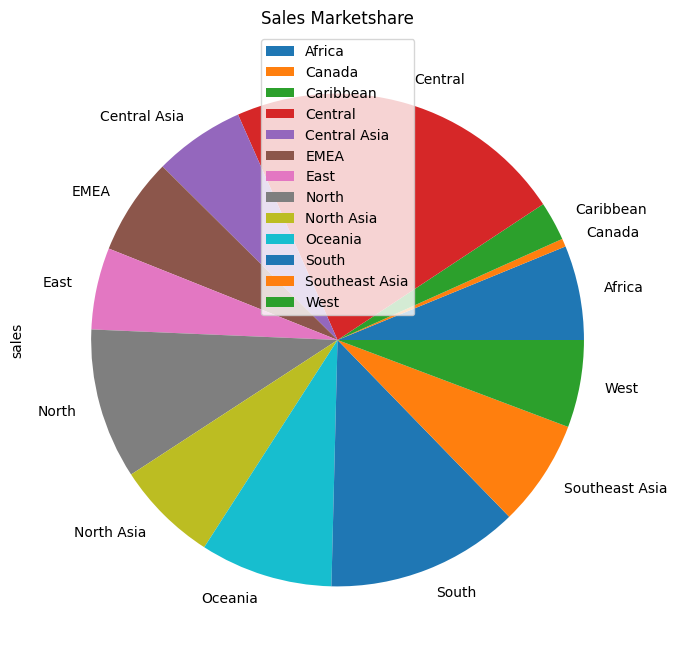

In [ ]:
# Plot a chart

# df.groupby('region').sum()[Facts] is the dataframe that is being plotted
# plot(y = 'sales', kind='pie', figsize=(12, 8), title = 'Sales Marketshare');
# x is not specified because the index of the dataframe, 'region' is the default x

df.groupby('region').sum(numeric_only=True)[Facts].plot(y = 'sales', kind='pie', figsize=(12, 8), title = 'Sales Marketshare');

# this image can be right clicked and saved as a file

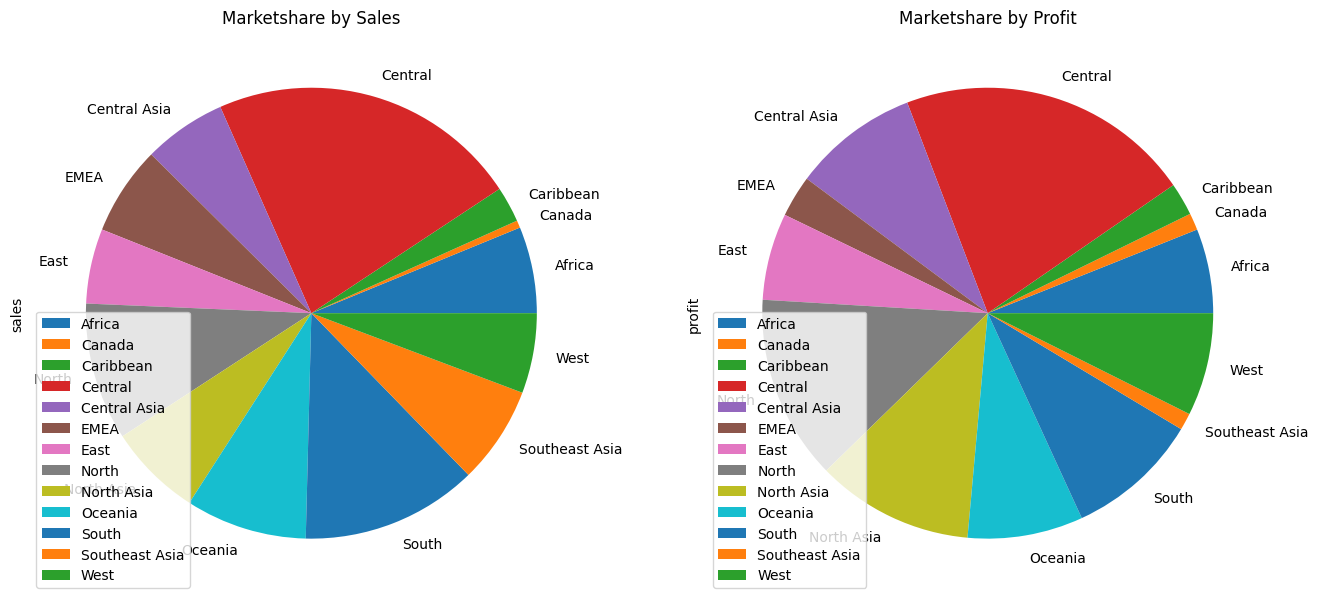

In [ ]:
# Plot a chart

# Only two columns, 'sales', 'profit' are used
# df.groupby('region').sum()[UsedFacts]

UsedFacts = ['sales','profit']
df.groupby('region').sum(numeric_only=True)[UsedFacts].round(decimals = 2).\
plot(subplots=True, kind='pie', figsize=(16, 8), title = ['Marketshare by Sales','Marketshare by Profit']);

# Two charts are drawn simultaenously, using the subplots=True option

### Sales, Profit by COUNTRY

In [ ]:
#Countries with maximum sales
#Too many countries, so we choose the top 5 or 10

#df.groupby('country').sum()[Facts].round(decimals = 2)
#df.groupby('country').sum()[Facts].sort_values('sales',axis=0, ascending= False).round(decimals = 2)
df.groupby('country').sum(numeric_only=True)[Facts].sort_values('sales',axis=0, ascending= False).round(decimals = 2).head(10)

# But this misses out the data from the other countries

,sales,quantity,discount,profit,shipping_cost
country,,,,,
United States,2297354,37873,1561.09,286397.02,238173.79
Australia,925257,10673,407.20,105484.96,100359.02
France,858930,10804,204.35,109029.00,95387.81
China,700591,7081,26.90,150683.08,78957.02
Germany,628857,7745,117.80,107322.82,63965.18
Mexico,622620,10011,162.93,102818.10,67659.85
India,589664,5758,27.50,129071.84,61780.72
United Kingdom,528570,6161,107.30,111900.15,53580.27
Indonesia,404887,5237,413.26,15608.68,43948.62


In [ ]:
#
# We create the list of top 10 countries by choosing only the dataframe.index
# and then convert the resultant pandas.series into a python list
#
Top10Countries = list(df.groupby('country').sum(numeric_only=True)[Facts].sort_values('sales',axis=0, ascending= False).head(10).index)
print(Top10Countries)

['United States', 'Australia', 'France', 'China', 'Germany', 'Mexico', 'India', 'United Kingdom', 'Indonesia', 'Brazil']


In [ ]:
# Replace nonTop10Country names with OTHER
#
dfCopy = df.copy()
dfCopy.loc[~dfCopy['country'].isin(Top10Countries),'country'] = 'Other'

# Countries with maximum sales
#dfCopy.groupby('country').sum()[Facts].round(decimals = 2)
dfCopy.groupby('country').sum(numeric_only=True)[Facts].sort_values('sales',axis=0, ascending= False).round(decimals = 2)


,sales,quantity,discount,profit,shipping_cost
country,,,,,
Other,4725077,70821,4068.58,320628.67,510837.68
United States,2297354,37873,1561.09,286397.02,238173.79
Australia,925257,10673,407.20,105484.96,100359.02
France,858930,10804,204.35,109029.00,95387.81
China,700591,7081,26.90,150683.08,78957.02
Germany,628857,7745,117.80,107322.82,63965.18
Mexico,622620,10011,162.93,102818.10,67659.85
India,589664,5758,27.50,129071.84,61780.72
United Kingdom,528570,6161,107.30,111900.15,53580.27


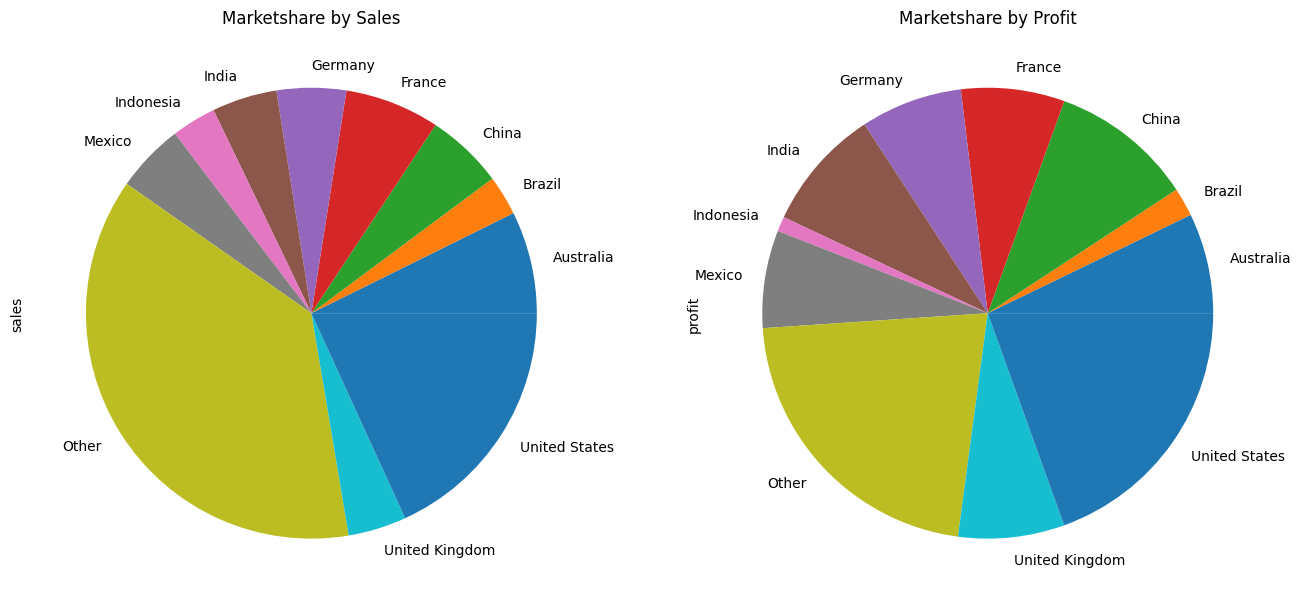

In [ ]:
# Plot a chart of Marketshare by sales, profit for Top 10 countries and OTHERs
#
UsedFacts = ['sales','profit']
dfCopy.groupby('country').sum(numeric_only=True)[UsedFacts].round(decimals = 2).\
plot(subplots=True, kind='pie', figsize=(16, 8), title = ['Marketshare by Sales','Marketshare by Profit'], legend=False);

### Sales, Profit by Sub_Category

In [ ]:
# Top 10 Sub_categories
Top10SubCat = list(df.groupby('sub_category').sum(numeric_only=True)[Facts].sort_values('sales',axis=0, ascending= False).head(10).index)
print(Top10SubCat)

['Phones', 'Copiers', 'Chairs', 'Bookcases', 'Storage', 'Appliances', 'Machines', 'Tables', 'Accessories', 'Binders']


In [ ]:
# Replace nonTop10 sub category names with OTHER
dfCopy = df.copy()
dfCopy.loc[~dfCopy['sub_category'].isin(Top10SubCat),'sub_category'] = 'Other'

# Countries with maximum sales
dfCopy.groupby('sub_category').sum(numeric_only=True)[Facts].sort_values('sales',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
sub_category,,,,,
Phones,1706874,11870,489.61,216717.01,184902.77
Other,1572782,74983,2724.40,242849.33,169169.18
Copiers,1509439,7454,260.42,258567.55,159496.49
Chairs,1501682,12336,560.12,141973.80,164229.85
Bookcases,1466559,8310,370.71,161924.42,155482.23
Storage,1127124,16917,700.49,108461.49,120546.46
Appliances,1011081,6078,248.70,141680.59,108300.78
Machines,779071,4906,252.00,58867.87,79135.90
Tables,757034,3083,250.32,-64083.39,79861.46


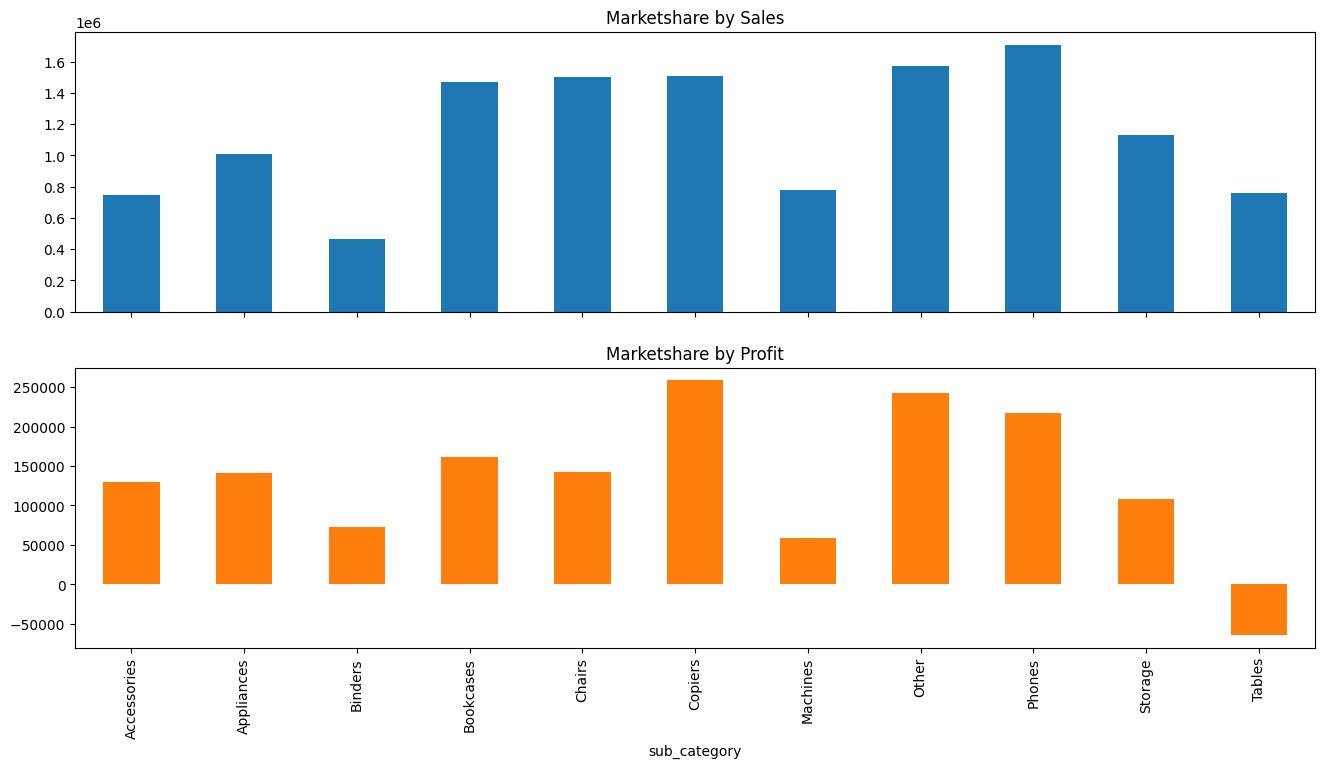

In [ ]:
# Plot a chart
UsedFacts = ['sales','profit']
dfCopy.groupby('sub_category').sum(numeric_only=True)[UsedFacts].round(decimals = 2).\
plot(subplots=True, kind='bar', figsize=(16, 8), title = ['Marketshare by Sales','Marketshare by Profit'], legend=False);

#since sub_cat Tables shows a loss, a negative profit, a pie-chart cannot be drawn, hence bar chart used

### Sales, Profit by Product

In [ ]:
Top10Products = list(df.groupby('product_name').sum(numeric_only=True)[Facts].sort_values('sales',axis=0, ascending= False).head(10).index)
print(Top10Products)

['Apple Smart Phone, Full Size', 'Cisco Smart Phone, Full Size', 'Motorola Smart Phone, Full Size', 'Nokia Smart Phone, Full Size', 'Canon imageCLASS 2200 Advanced Copier', 'Hon Executive Leather Armchair, Adjustable', 'Office Star Executive Leather Armchair, Adjustable', 'Harbour Creations Executive Leather Armchair, Adjustable', 'Samsung Smart Phone, Cordless', 'Nokia Smart Phone, with Caller ID']


In [ ]:
# Replace nonTop10Product names with OTHER
# But first create a copy of the dataframe
#
dfCopy = df.copy()
dfCopy.loc[~dfCopy['product_name'].isin(Top10Products),'product_name'] = 'Other'

# Countries with maximum sales
dfCopy.groupby('product_name').sum(numeric_only=True)[Facts].sort_values('product_name',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
product_name,,,,,
"Samsung Smart Phone, Cordless",48654,108,3.26,-198.09,5892.09
Other,12017344,177045,7280.86,1363306.69,1291126.81
"Office Star Executive Leather Armchair, Adjustable",50667,141,6.47,4710.98,5141.74
"Nokia Smart Phone, with Caller ID",47880,96,3.54,9465.33,5321.11
"Nokia Smart Phone, Full Size",71904,147,6.79,9938.20,7852.66
"Motorola Smart Phone, Full Size",73159,134,5.61,17027.11,8817.34
"Hon Executive Leather Armchair, Adjustable",58200,169,8.11,5997.25,5751.56
"Harbour Creations Executive Leather Armchair, Adjustable",50120,142,6.98,10427.33,6548.17
"Cisco Smart Phone, Full Size",76441,139,2.07,17238.52,7065.16


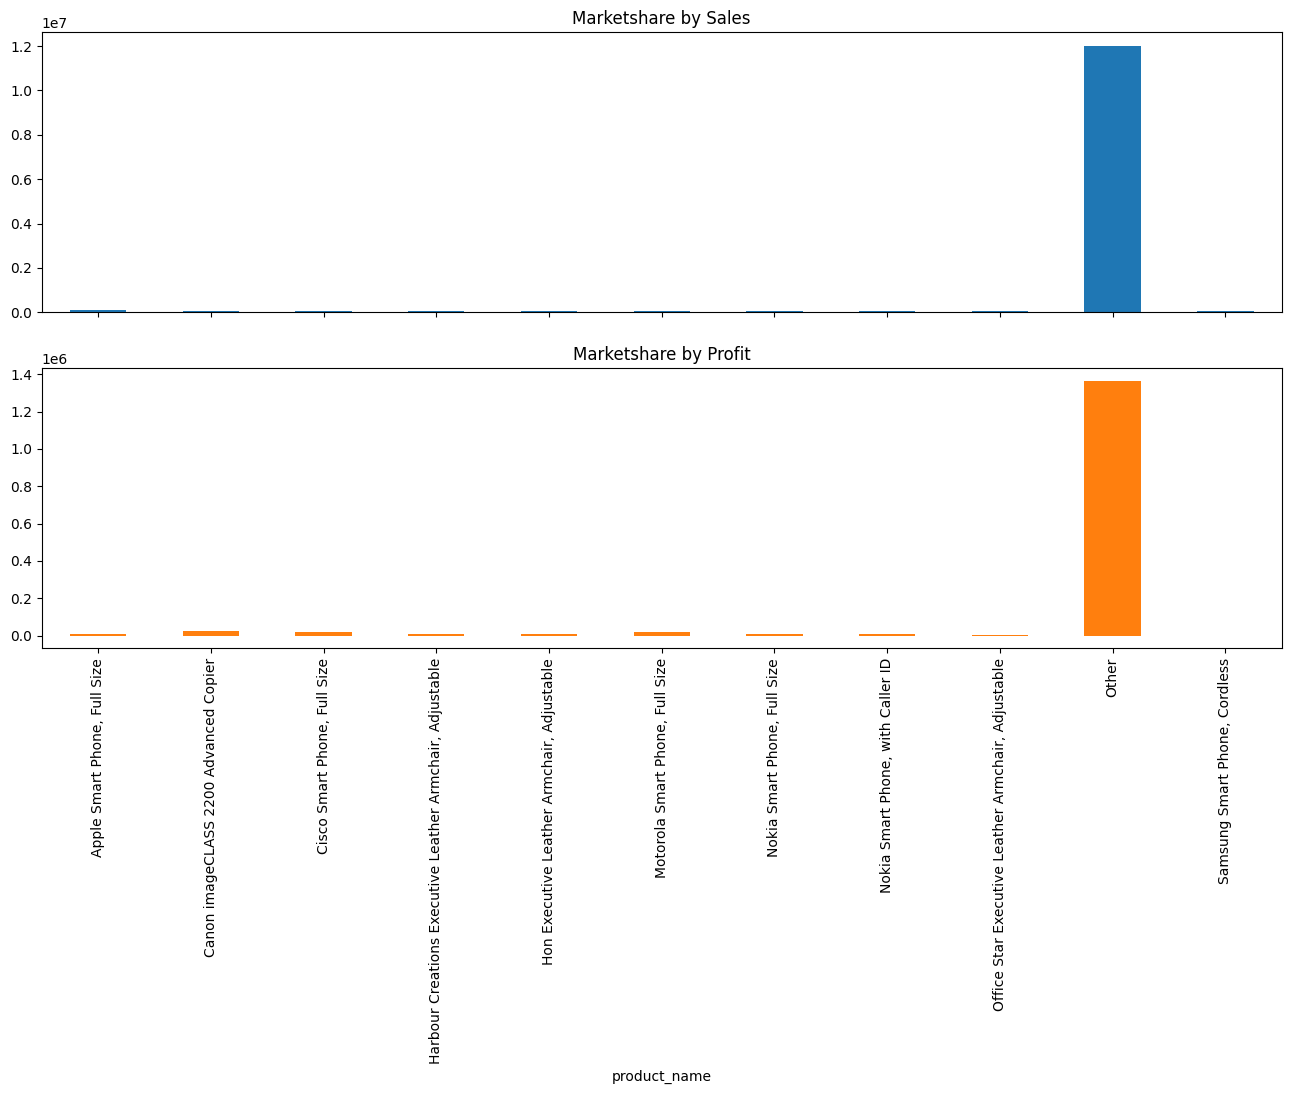

In [ ]:
# Plot a chart
UsedFacts = ['sales','profit']
dfCopy.groupby('product_name').sum(numeric_only=True)[UsedFacts].round(decimals = 2).\
plot(subplots=True, kind='bar', figsize=(16, 8), title = ['Marketshare by Sales','Marketshare by Profit'], legend=False);

# The OTHER products are so large that the graph is not useful

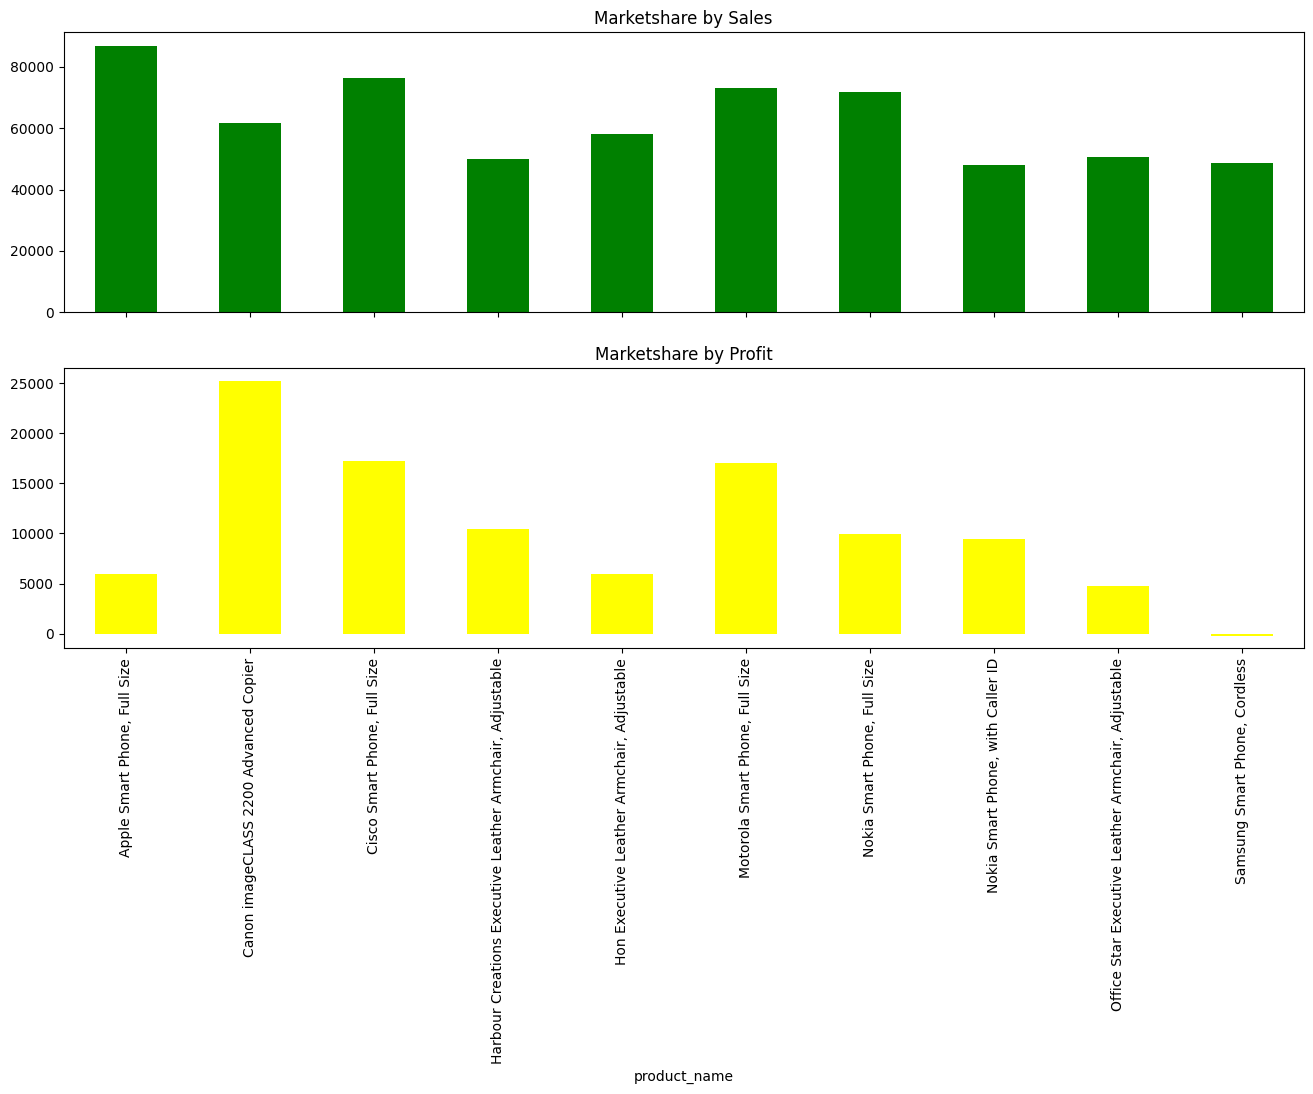

In [ ]:
# Plot a chart, excluding OTHER products
UsedFacts = ['sales','profit']

# dfCopy[dfCopy['product_name'] != 'Other'] ensures that rows with data about OTHERS is excluded from this analysis

dfCopy[dfCopy['product_name'] != 'Other'].groupby('product_name').sum(numeric_only=True)[UsedFacts].round(decimals = 2).\
plot(subplots=True, kind='bar', figsize=(16, 8), title = ['Marketshare by Sales','Marketshare by Profit'], legend=False, color =['green','yellow']);

##Two Dimensions - Pivot Tables

###Basic Pivot

In [ ]:
# Here we show total 'sales' grouped by region and category
#
pd.pivot_table(df, index = 'region', columns = 'category', values = 'sales', aggfunc = 'sum', margins = True)

category,Furniture,Office Supplies,Technology,All
region,,,,
Africa,194650,266752,322374,783776
Canada,10595,30037,26300,66932
Caribbean,118379,89565,116337,324281
Central,860413,923471,1038515,2822399
Central Asia,284369,162768,305702,752839
EMEA,228627,276712,300845,806184
East,208291,205549,264994,678834
North,377612,374778,495802,1248192
North Asia,335725,198581,314043,848349


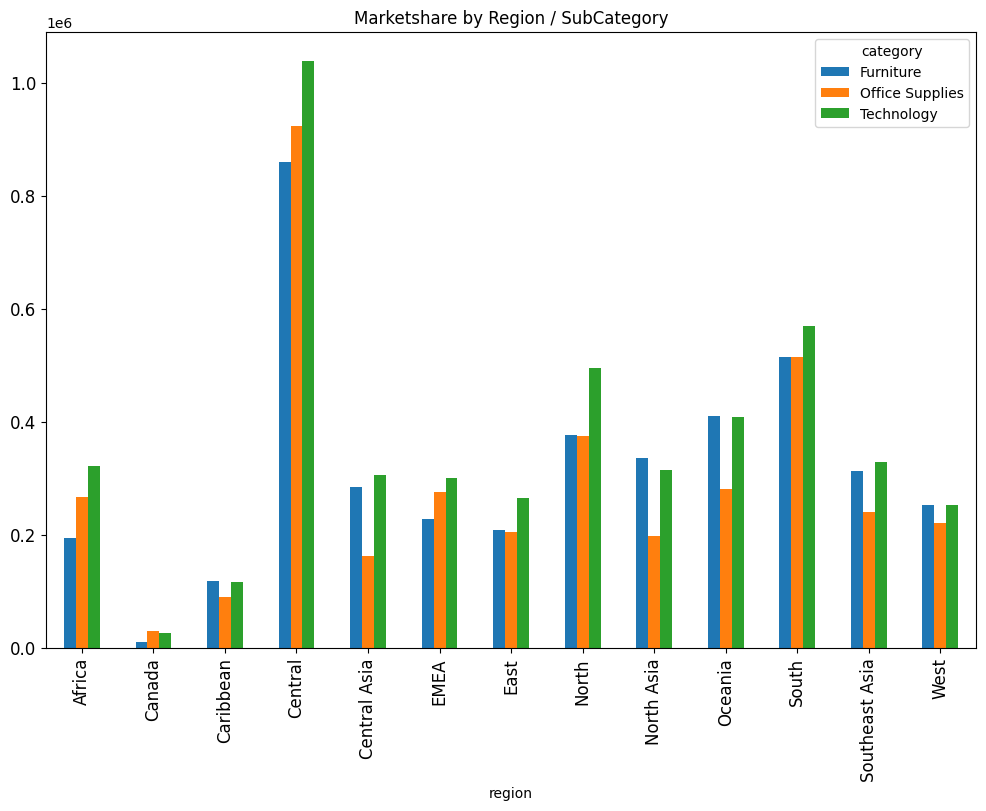

In [ ]:
# Same data is shown graphically
#
pd.pivot_table(df, index = 'region', columns = 'category', values = 'sales', aggfunc = 'sum').\
plot(kind='bar',subplots=False, figsize=(12, 8), title = 'Marketshare by Region / SubCategory',fontsize=12);

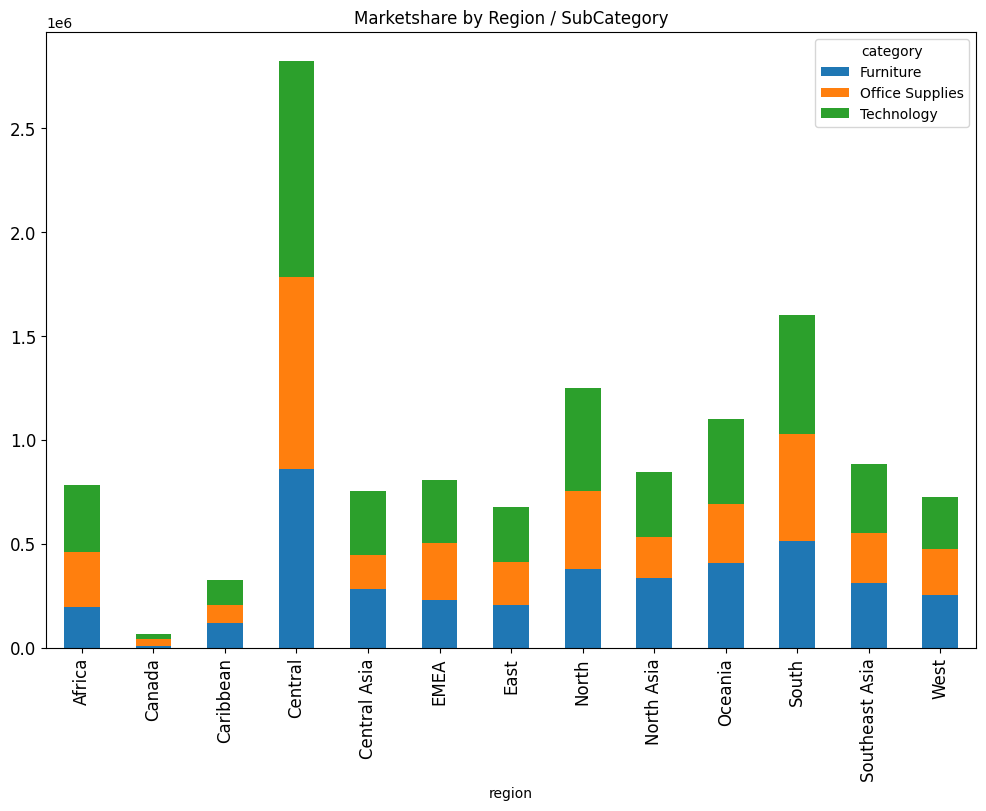

In [ ]:
# Improving the chart, using stacked bars, stacked=True
#
pd.pivot_table(df, index = 'region', columns = 'category', values = 'sales', aggfunc = 'sum').\
plot(kind='bar',stacked=True,subplots=False, figsize=(12, 8), title = 'Marketshare by Region / SubCategory',fontsize=12);

#### Information overload ...

In [ ]:
# Sub Category and Regions
#
pd.pivot_table(df, index = 'region', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins = True)

sub_category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,All
region,,,,,,,,,,,,,,,,,,
Africa,42178,62196,38433,22308,83457,56040,96257,9687,5821,20622,4879,69109,13498,114830,96671,13259,34531,783776
Canada,4472,7941,4121,3091,5734,3202,7467,567,478,809,423,4275,1520,10086,10586,1310,850,66932
Caribbean,20294,30062,6085,8463,39363,45186,49999,6341,3344,10170,2195,5164,7183,40880,18668,7224,23660,324281
Central,174124,214856,112201,130246,315413,328569,322978,37354,18324,83305,15655,171198,51831,370215,292394,50610,133126,2822399
Central Asia,43619,55618,10827,12291,120159,90673,91403,10911,5703,22025,4517,37965,14715,132715,33636,14550,51512,752839
EMEA,44166,68268,38160,26685,91735,69821,80131,10572,6351,27740,4096,62027,10246,114521,98182,14152,39331,806184
East,45038,34191,7498,53501,43819,96263,53220,4375,821,29067,2608,66108,20174,100628,71618,10763,39142,678834
North,69283,107381,43815,31743,159661,123574,175891,22142,9980,22728,6996,70209,17010,180419,112389,23322,71649,1248192
North Asia,39296,55909,16444,14672,130070,129336,123039,13859,7299,22020,5168,48838,14194,102870,53743,17293,54299,848349


In [ ]:
#too much information
pd.pivot_table(df, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins = True)

sub_category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,All
country,,,,,,,,,,,,,,,,,,
Afghanistan,2047.0,669.0,444.0,586.0,2802.0,1331.0,1139.0,514.0,59.0,812.0,119.0,346.0,309.0,2930.0,762.0,464.0,6341.0,21674
Albania,NaN,NaN,223.0,34.0,778.0,NaN,NaN,NaN,NaN,58.0,11.0,1704.0,NaN,736.0,344.0,NaN,NaN,3888
Algeria,1237.0,3785.0,1697.0,1249.0,6130.0,1350.0,4823.0,532.0,497.0,627.0,145.0,4824.0,1965.0,2706.0,4012.0,191.0,320.0,36090
Angola,1597.0,118.0,532.0,686.0,4637.0,982.0,950.0,428.0,290.0,917.0,519.0,963.0,286.0,5141.0,5161.0,149.0,2195.0,25551
Argentina,3508.0,3041.0,1645.0,315.0,7706.0,11101.0,8516.0,1383.0,595.0,1279.0,282.0,594.0,1247.0,7895.0,3950.0,1014.0,3439.0,57510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,5742.0,8656.0,1595.0,1466.0,5906.0,11284.0,6195.0,1245.0,547.0,2335.0,626.0,1770.0,1012.0,8615.0,4609.0,1973.0,2226.0,65802
Yemen,NaN,719.0,219.0,20.0,NaN,53.0,214.0,12.0,NaN,28.0,NaN,459.0,33.0,203.0,408.0,21.0,75.0,2464
Zambia,443.0,1314.0,891.0,472.0,5452.0,1774.0,2909.0,559.0,148.0,847.0,149.0,2812.0,287.0,2134.0,3474.0,230.0,2134.0,26029


### Reduced Pivot

#### Top5 Countries, Top5 Sub_Categories | SALES

In [ ]:
#
# Get the list of Top 5 countries
# Get the list of Top 5 SubCategories
#
Top5CountriesSales = list(df.groupby('country').sum(numeric_only=True)[Facts].sort_values('sales',axis=0, ascending= False).head(5).index)
Top5SubCategoriesSales = list(df.groupby('sub_category').sum(numeric_only=True)[Facts].sort_values('sales',axis=0, ascending= False).head(5).index)
Top5CountriesSales, Top5SubCategoriesSales

(['United States', 'Australia', 'France', 'China', 'Germany'],
 ['Phones', 'Copiers', 'Chairs', 'Bookcases', 'Storage'])

In [ ]:
# Get ONLY Top5 data for both country and sub-category
# Create a copy with only Top 5 data
dfCopy = df[df['sub_category'].isin(Top5SubCategoriesSales) & df['country'].isin(Top5CountriesSales) ]
pd.pivot_table(dfCopy, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins=True)

# However,
# This misses out the data from the non Top 5 completely

sub_category,Bookcases,Chairs,Copiers,Phones,Storage,All
country,,,,,,
Australia,127174,142474,138263,101706,55176,564793
China,106036,108830,109252,79329,43743,447190
France,95308,91512,95140,89966,96571,468497
Germany,69344,49817,77093,104590,72657,373501
United States,114879,328454,149530,330047,223862,1146772
All,512741,721087,569278,705638,492009,3000753


In [ ]:
#
# Including the notTop5 data into the pivot
#
# Create a copy of the dataset

dfCopy = df.copy()

# If country name is NOT in the Top5 lists, replace it with nonTop5
# If sub_category name is NOT in Top5 list, replace it with nonTop5
#

dfCopy.loc[~dfCopy['country'].isin(Top5CountriesSales),'country'] = 'notTop5'
dfCopy.loc[~dfCopy['sub_category'].isin(Top5SubCategoriesSales),'sub_category'] = 'notTop5'

# then create the pivot

pd.pivot_table(dfCopy, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins=True)
#df_2['country'].unique()

sub_category,Bookcases,Chairs,Copiers,Phones,Storage,notTop5,All
country,,,,,,,
Australia,127174,142474,138263,101706,55176,360464,925257
China,106036,108830,109252,79329,43743,253401,700591
France,95308,91512,95140,89966,96571,390433,858930
Germany,69344,49817,77093,104590,72657,255356,628857
United States,114879,328454,149530,330047,223862,1150582,2297354
notTop5,953818,780595,940161,1001236,635115,2920991,7231916
All,1466559,1501682,1509439,1706874,1127124,5331227,12642905


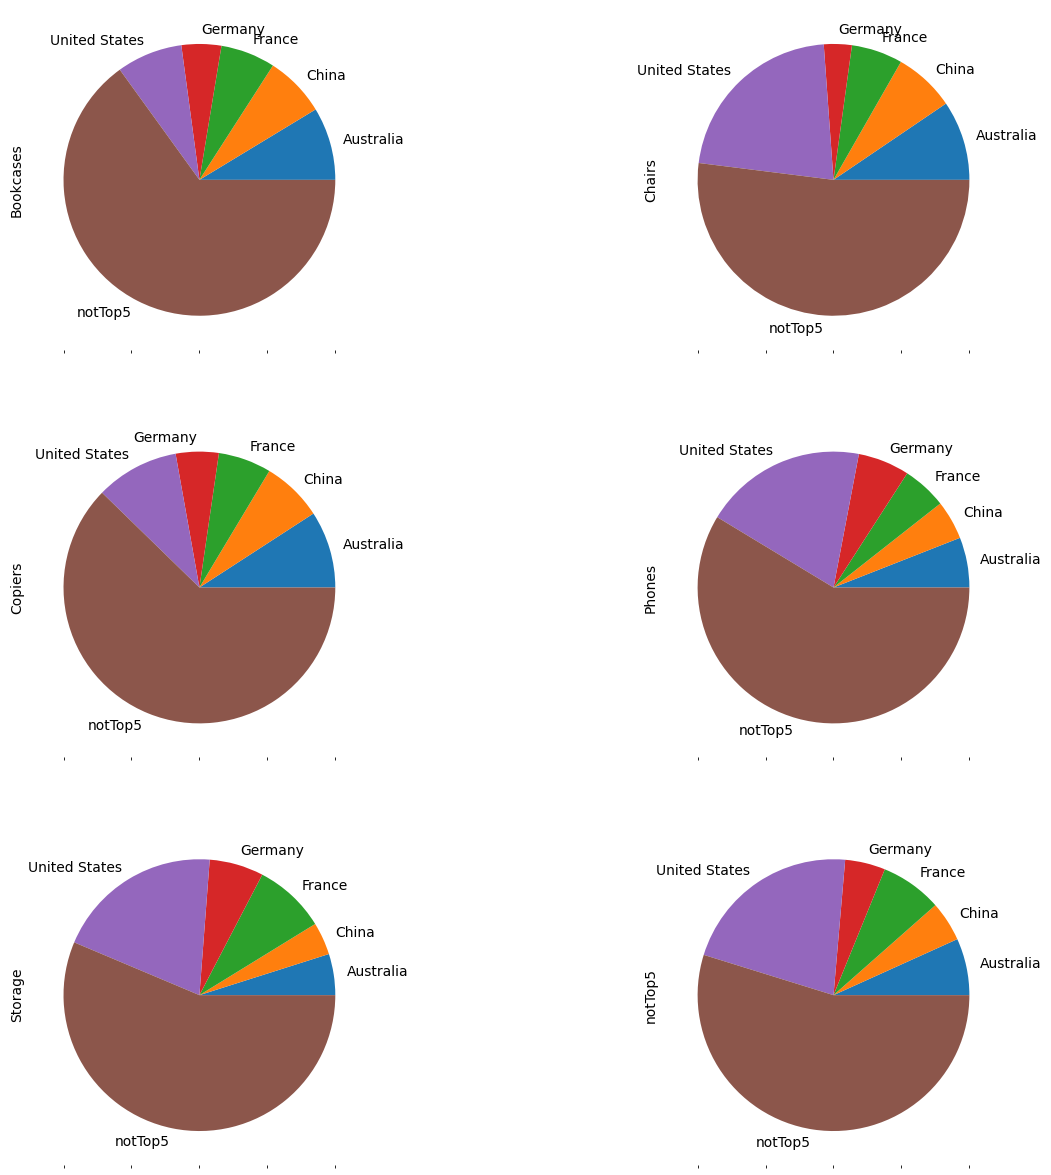

In [ ]:
# Now Plot the data
#
pd.pivot_table(dfCopy, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum').\
plot(kind='pie',subplots=True, layout = (3,2), figsize=(15, 15), legend = False );

#### Top 5 Countries, Top 5 Product_Names | SALES
repeat with Products

In [ ]:
Top5CountriesSales = list(df.groupby('country').sum(numeric_only=True)[Facts].sort_values('sales',axis=0, ascending= False).head(5).index)
Top5ProductNamesSales = list(df.groupby('product_name').sum(numeric_only=True)[Facts].sort_values('sales',axis=0, ascending= False).head(5).index)
print(Top5CountriesSales,'\n', Top5ProductNamesSales)

['United States', 'Australia', 'France', 'China', 'Germany'] 
 ['Apple Smart Phone, Full Size', 'Cisco Smart Phone, Full Size', 'Motorola Smart Phone, Full Size', 'Nokia Smart Phone, Full Size', 'Canon imageCLASS 2200 Advanced Copier']


In [ ]:
# Including the notTop5 data into the pivot
# Unfortunately this show too much empty space. Top ranking countries are not using the top ranking products
dfCopy = df.copy()
dfCopy.loc[~dfCopy['country'].isin(Top5CountriesSales),'country'] = 'notTop5'
dfCopy.loc[~dfCopy['product_name'].isin(Top5ProductNamesSales),'product_name'] = 'notTop5'
pd.pivot_table(dfCopy, index = 'product_name', columns = 'country', values = 'sales', aggfunc = 'sum', margins=True)

country,Australia,China,France,Germany,United States,notTop5,All
product_name,,,,,,,
"Apple Smart Phone, Full Size",1721.0,7013.0,7583.0,1913.0,NaN,68706.0,86936
Canon imageCLASS 2200 Advanced Copier,NaN,NaN,NaN,NaN,61600.0,NaN,61600
"Cisco Smart Phone, Full Size",3524.0,6514.0,1110.0,10432.0,NaN,54861.0,76441
"Motorola Smart Phone, Full Size",9200.0,NaN,NaN,5791.0,NaN,58168.0,73159
"Nokia Smart Phone, Full Size",2544.0,1275.0,5950.0,7317.0,NaN,54818.0,71904
notTop5,908268.0,685789.0,844287.0,603404.0,2235754.0,6995363.0,12272865
All,925257.0,700591.0,858930.0,628857.0,2297354.0,7231916.0,12642905


In [ ]:
# charts are useless
#pd.pivot_table(dfCopy, index = 'product_name', columns = 'country', values = 'sales', aggfunc = 'sum').\
#plot(kind='pie',subplots=True, layout = (3,2), figsize=(15, 15), legend = False );

####80:20 Analysis

##### Countries accounting for 80% profits

In [ ]:
#AllFacts = ['sales','quantity','discount','profit','shipping_cost']
#df_3 = df.copy()
df.groupby('country').sum(numeric_only=True)['profit'].round(decimals = 2)
dfCopy = df.groupby('country').sum(numeric_only=True)['profit'].sort_values(ascending= False).round().to_frame()
dfCopy

,profit
country,
United States,286397.0
China,150683.0
India,129072.0
United Kingdom,111900.0
France,109029.0
...,...
Pakistan,-22447.0
Honduras,-29482.0
Netherlands,-41070.0


In [ ]:
#T = df_3.sum()['profit']
# We locate what fraction of profit is made in each country
#
dfCopy['profit_pct'] = dfCopy['profit']/dfCopy.sum()['profit']
dfCopy

,profit,profit_pct
country,,
United States,286397.0,0.194956
China,150683.0,0.102573
India,129072.0,0.087862
United Kingdom,111900.0,0.076173
France,109029.0,0.074218
...,...,...
Pakistan,-22447.0,-0.015280
Honduras,-29482.0,-0.020069
Netherlands,-41070.0,-0.027957


In [ ]:
#dfCopy.cumsum()['profit_pct'].to_frame().head(10)
# Now we do the cumulative sum of fraction of profits and stop where that falls below 0.8
#
dfCopy.cumsum()['profit_pct'].to_frame()[dfCopy.cumsum()['profit_pct'].to_frame()['profit_pct'] < 0.8]

,profit_pct
country,
United States,0.194956
China,0.297529
India,0.385391
United Kingdom,0.461564
France,0.535782
Germany,0.608839
Australia,0.680645
Mexico,0.750636
Spain,0.787660


In [ ]:
# Now we identify countries that account for 80% profits
#
Countries80pcProfit = list(dfCopy.cumsum()['profit_pct'].to_frame()[dfCopy.cumsum()['profit_pct'].to_frame()['profit_pct'] < 0.8].index)
print(Countries80pcProfit)

['United States', 'China', 'India', 'United Kingdom', 'France', 'Germany', 'Australia', 'Mexico', 'Spain']


##### Sub Categories accounting for 80% profit

In [ ]:
# Same analysis for sub-categories
#
df.groupby('sub_category').sum(numeric_only=True)['profit'].round(decimals = 2)
dfCopy = df.groupby('sub_category').sum(numeric_only=True)['profit'].sort_values(ascending= False).round().to_frame()
dfCopy['profit_pct'] = dfCopy['profit']/dfCopy.sum(numeric_only=True)['profit']
dfCopy.cumsum()['profit_pct'].to_frame().head(10)

,profit_pct
sub_category,
Copiers,0.176012
Phones,0.323536
Bookcases,0.433760
Chairs,0.530405
Appliances,0.626850
Accessories,0.715088
Storage,0.788920
Binders,0.838238
Paper,0.878542


In [ ]:
SubCat80pcProfit = list(dfCopy.cumsum()['profit_pct'].to_frame()[dfCopy.cumsum()['profit_pct'].to_frame()['profit_pct'] < 0.8].index)
print(SubCat80pcProfit)

['Copiers', 'Phones', 'Bookcases', 'Chairs', 'Appliances', 'Accessories', 'Storage']


##### Sales Market Share for Reduced Data Set (80/20)

In [ ]:
# Make a copy of the data where
# Not top 5 countries are shown as other
# Not top 5 sub-categories are shown as other
#
dfCopy = df.copy()
dfCopy.loc[~dfCopy['country'].isin(Countries80pcProfit),'country'] = 'notTopProfit'
dfCopy.loc[~dfCopy['sub_category'].isin(SubCat80pcProfit),'sub_category'] = 'notTopProfit'
pd.pivot_table(dfCopy, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins=True)
#df_2['country'].unique()

sub_category,Accessories,Appliances,Bookcases,Chairs,Copiers,Phones,Storage,notTopProfit,All
country,,,,,,,,,
Australia,55167,94172,127174,142474,138263,101706,55176,211125,925257
China,33029,42120,106036,108830,109252,79329,43743,178252,700591
France,49157,78101,95308,91512,95140,89966,96571,263175,858930
Germany,35566,41876,69344,49817,77093,104590,72657,177914,628857
India,33649,45209,88984,68875,70384,104630,27644,150289,589664
Mexico,40154,49549,77309,84389,98953,93231,41971,137064,622620
Spain,18243,35991,40481,15052,38314,34035,35728,69318,287162
United Kingdom,23618,47980,69865,26872,68430,77649,60304,153852,528570
United States,167401,107538,114879,328454,149530,330047,223862,875643,2297354


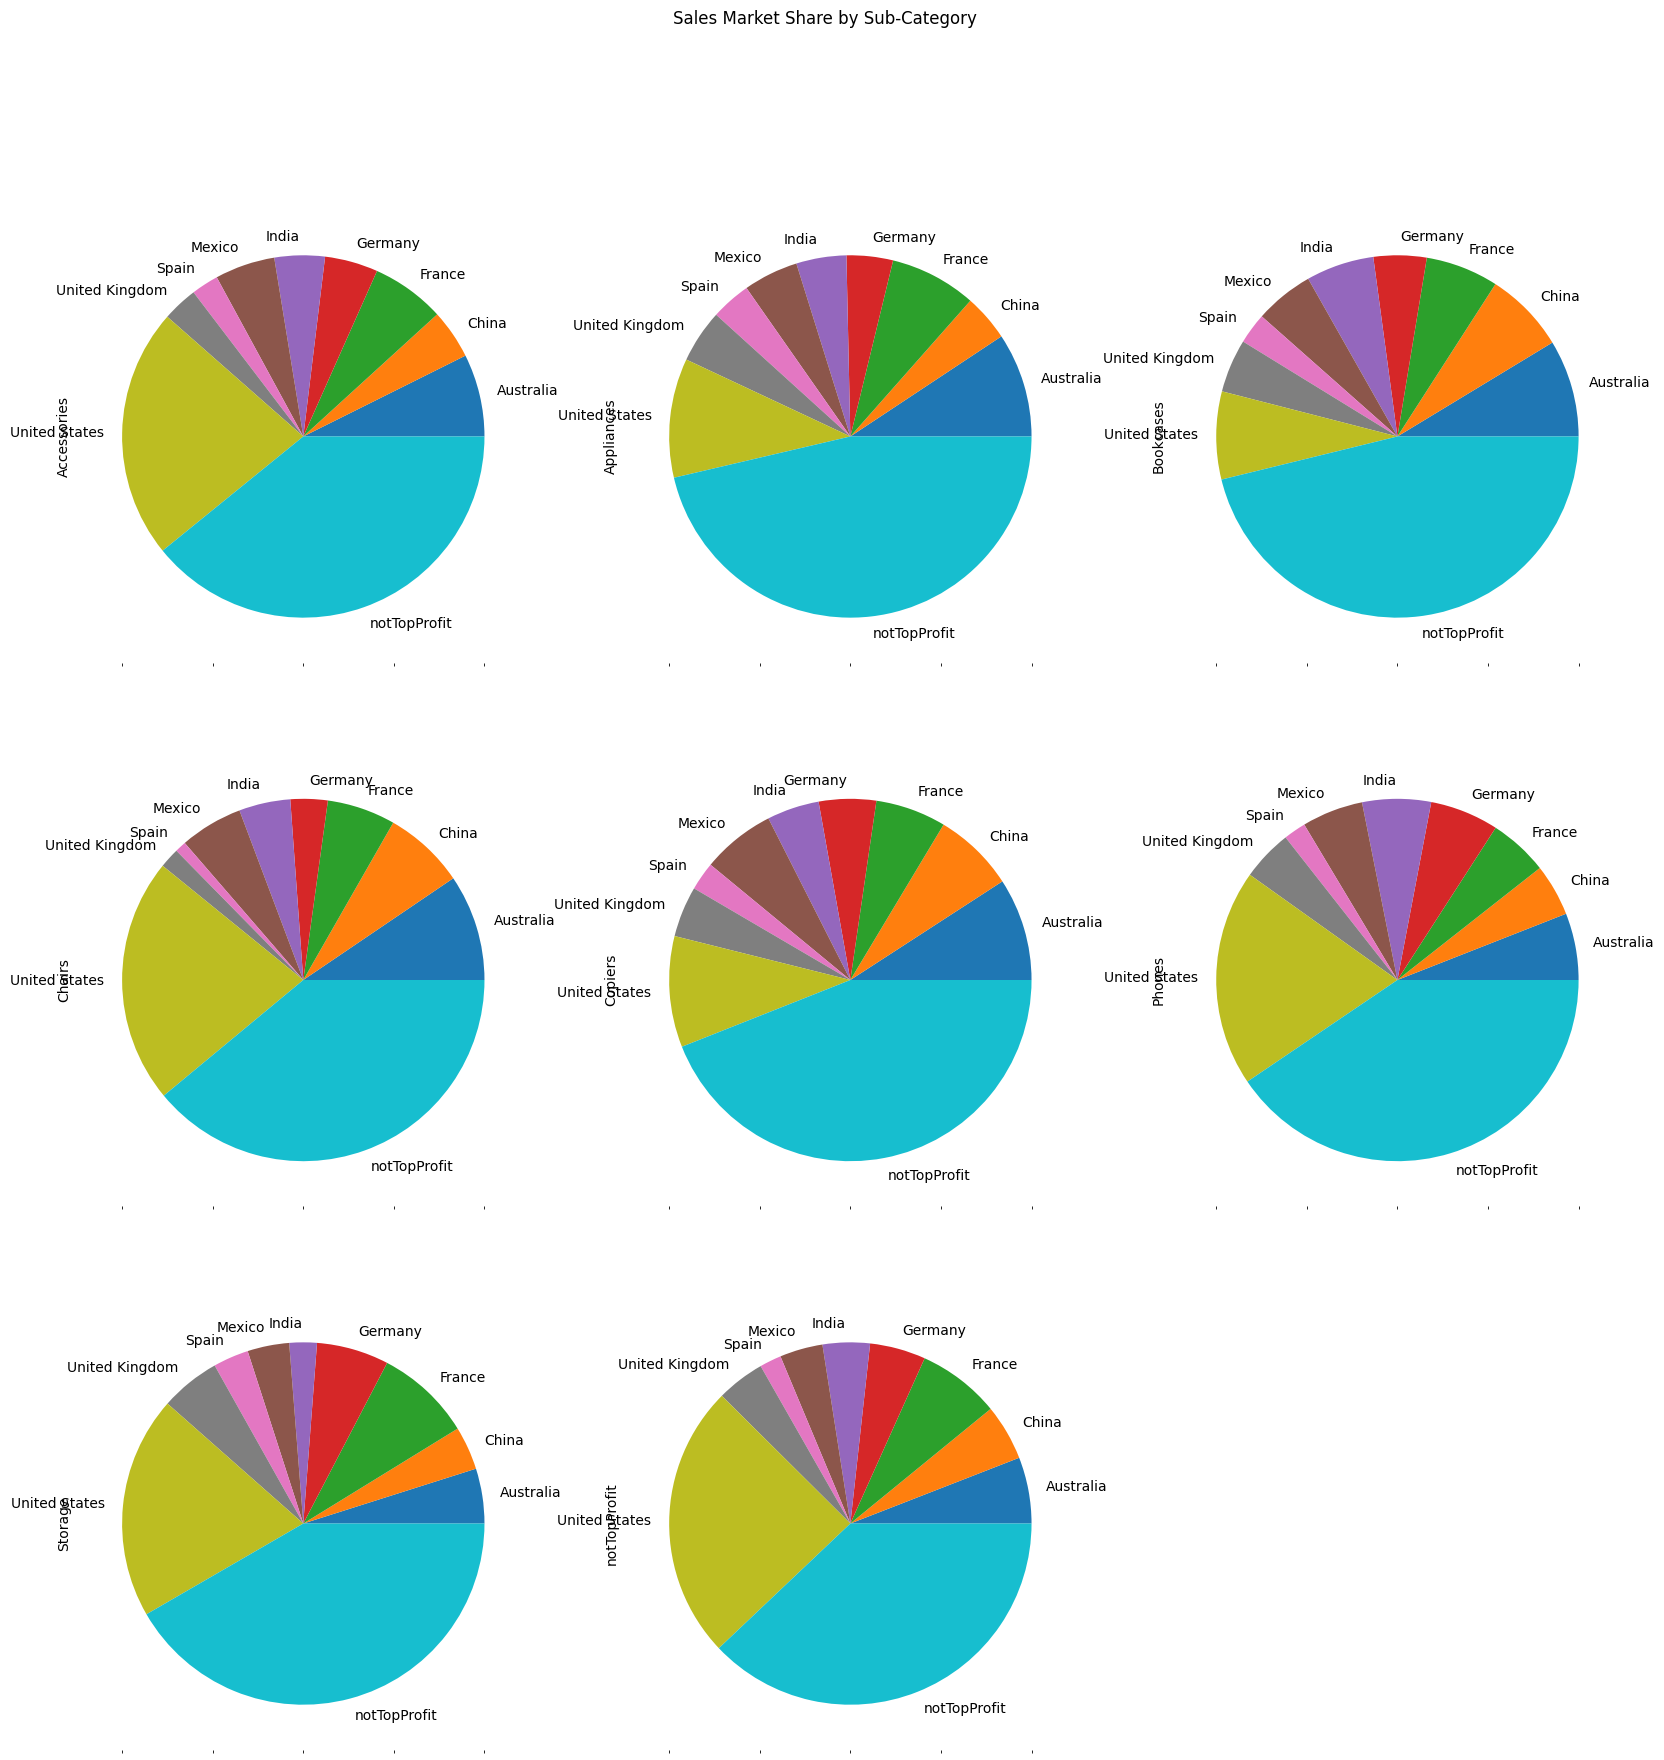

In [ ]:
#
# the pivots are calculated AND plotted in the same command
# analysis / graph by sub-category
#
pd.pivot_table(dfCopy, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum').\
plot(kind='pie',subplots=True, layout = (3,3), figsize=(20, 20), legend = False, title = 'Sales Market Share by Sub-Category' );

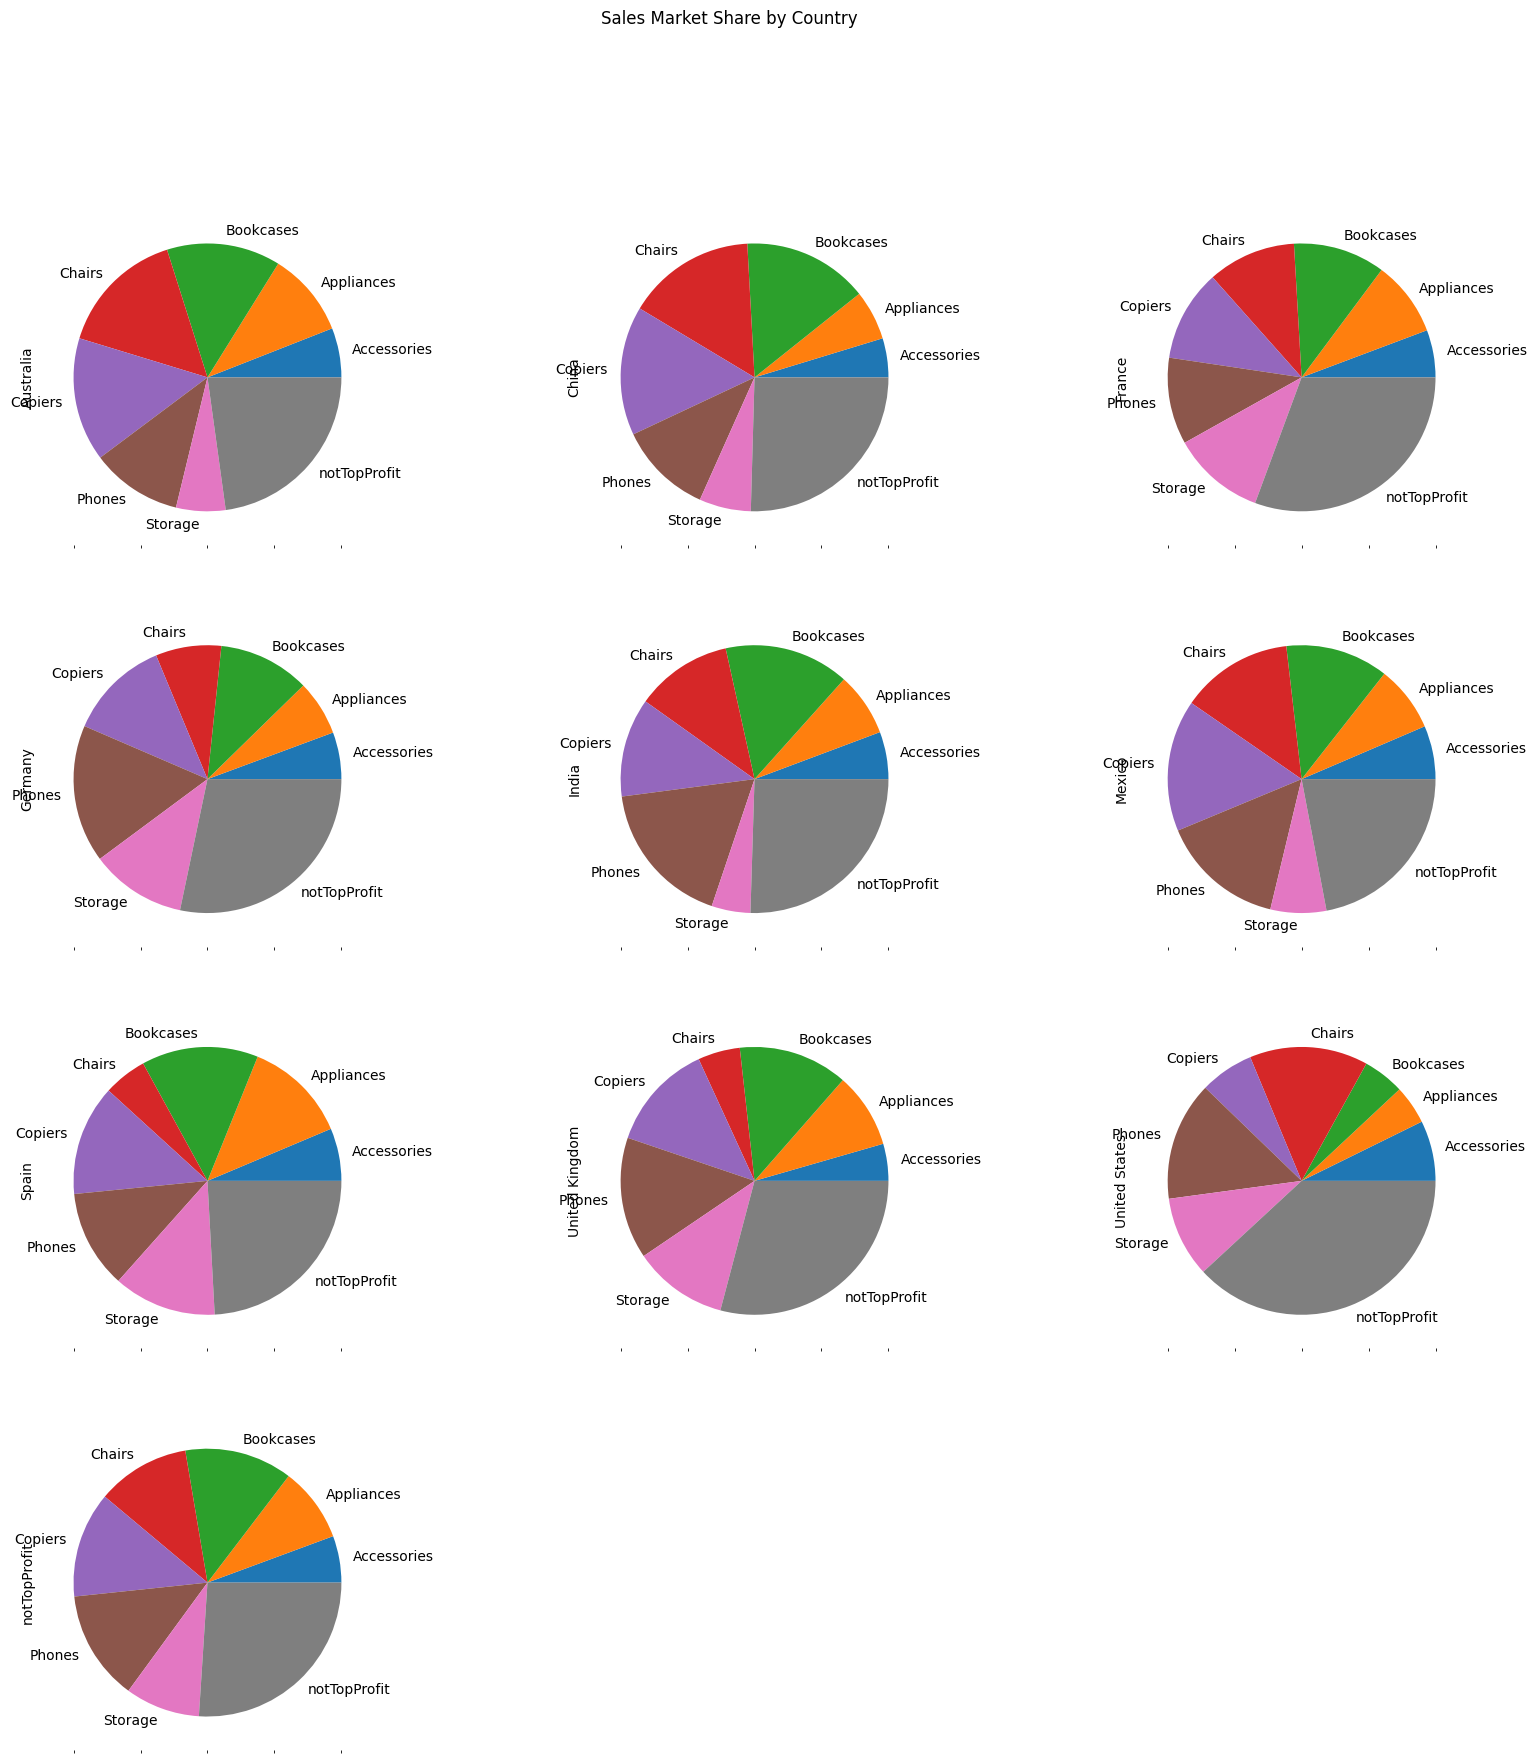

In [ ]:
#
# the pivots are calculated AND plotted in the same command
# analysis / graph by country
#
pd.pivot_table(dfCopy, index = 'sub_category', columns = 'country', values = 'sales', aggfunc = 'sum').\
plot(kind='pie',subplots=True, layout = (4,3), figsize=(20, 20), legend = False, title = 'Sales Market Share by Country' );

# Shipping Analysis
Here we look at quantity shipped

## Share of shipment in markets, sub-categories

In [ ]:
dfCopy = df.copy()
print(list(dfCopy.columns))

['order_date', 'ship_date', 'ship_mode', 'segment', 'state', 'country', 'market', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'order_priority', 'year']


In [ ]:
# drop irrelevent columns
dropColumns = ['ship_mode', 'segment', 'state',
       'market', 'region', 'product_id', 'category',
       'product_name', 'sales',  'discount', 'profit',
       'shipping_cost', 'order_priority']
dfCopy.drop(dropColumns, axis=1, inplace= True)
dfCopy.shape

(51290, 6)

In [ ]:
#year is int, better to convert to string object
dfCopy.dtypes

,0
order_date,datetime64[ns]
ship_date,datetime64[ns]
country,object
sub_category,object
quantity,int64
year,int64


In [ ]:
dfCopy['year'] = dfCopy['year'].astype(str)

In [ ]:
# Taken from 80:20 analysis
#
print(Countries80pcProfit)
print(SubCat80pcProfit)

['United States', 'China', 'India', 'United Kingdom', 'France', 'Germany', 'Australia', 'Mexico', 'Spain']
['Copiers', 'Phones', 'Bookcases', 'Chairs', 'Appliances', 'Accessories', 'Storage']


In [ ]:
dfCopy.loc[~dfCopy['country'].isin(Countries80pcProfit),'country'] = 'Not80pcProfit'
dfCopy.loc[~dfCopy['sub_category'].isin(SubCat80pcProfit),'sub_category'] = 'Not80pcProfit'

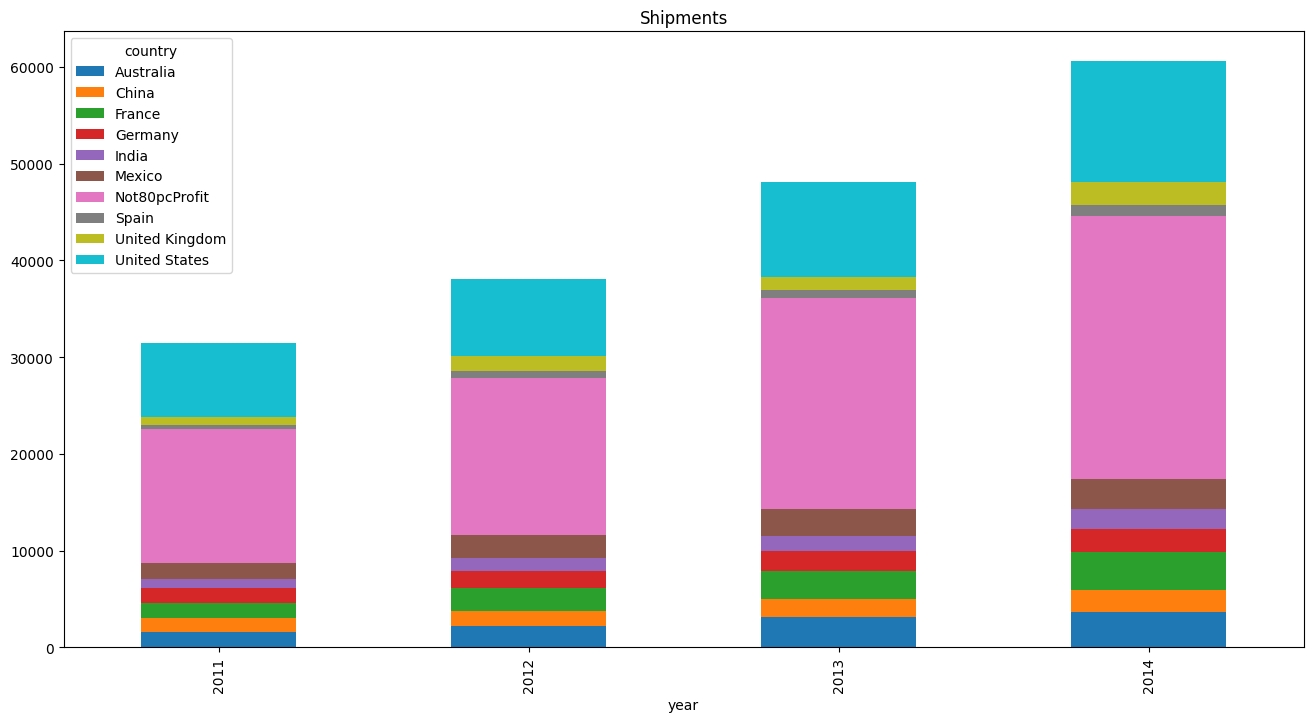

In [ ]:
pd.pivot_table(dfCopy, index = 'year', columns = 'country', values = 'quantity', aggfunc = 'sum').\
plot(kind = 'bar',stacked=True,figsize = (16,8),title = 'Shipments');

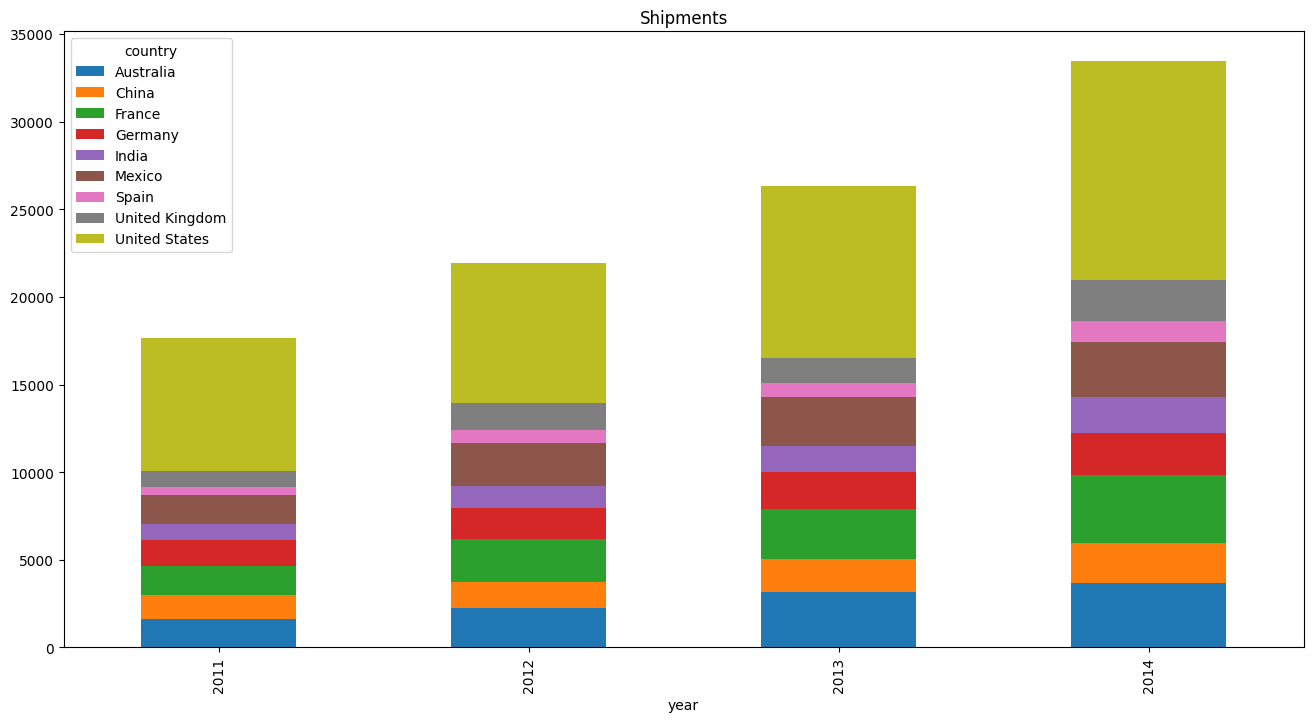

In [ ]:
# Exclude countries not in the 80Pc profit
#
pd.pivot_table(dfCopy[dfCopy['country'] != 'Not80pcProfit'], index = 'year', columns = 'country', values = 'quantity', aggfunc = 'sum').\
plot(kind = 'bar',stacked=True,figsize = (16,8),title = 'Shipments');

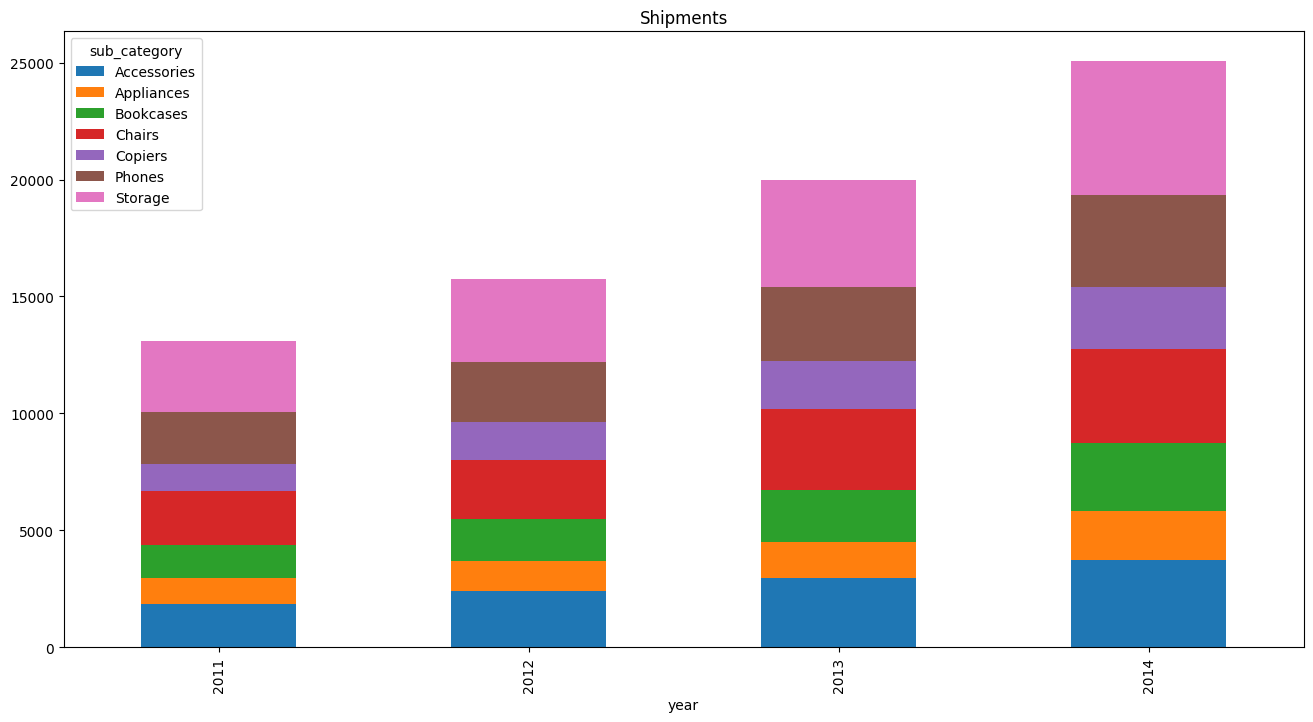

In [ ]:
pd.pivot_table(dfCopy[dfCopy['sub_category'] != 'Not80pcProfit'], index = 'year', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').\
plot(kind = 'bar',stacked=True,figsize = (16,8),title = 'Shipments');

## Shipments over time (year, month, week)
Simple Time Series<br>
How does sales ( or shipments) vary over the year ?

In [ ]:
dfCopy['shp-yr-mon'] = pd.to_datetime(dfCopy['ship_date']).dt.strftime('%Y-%m')

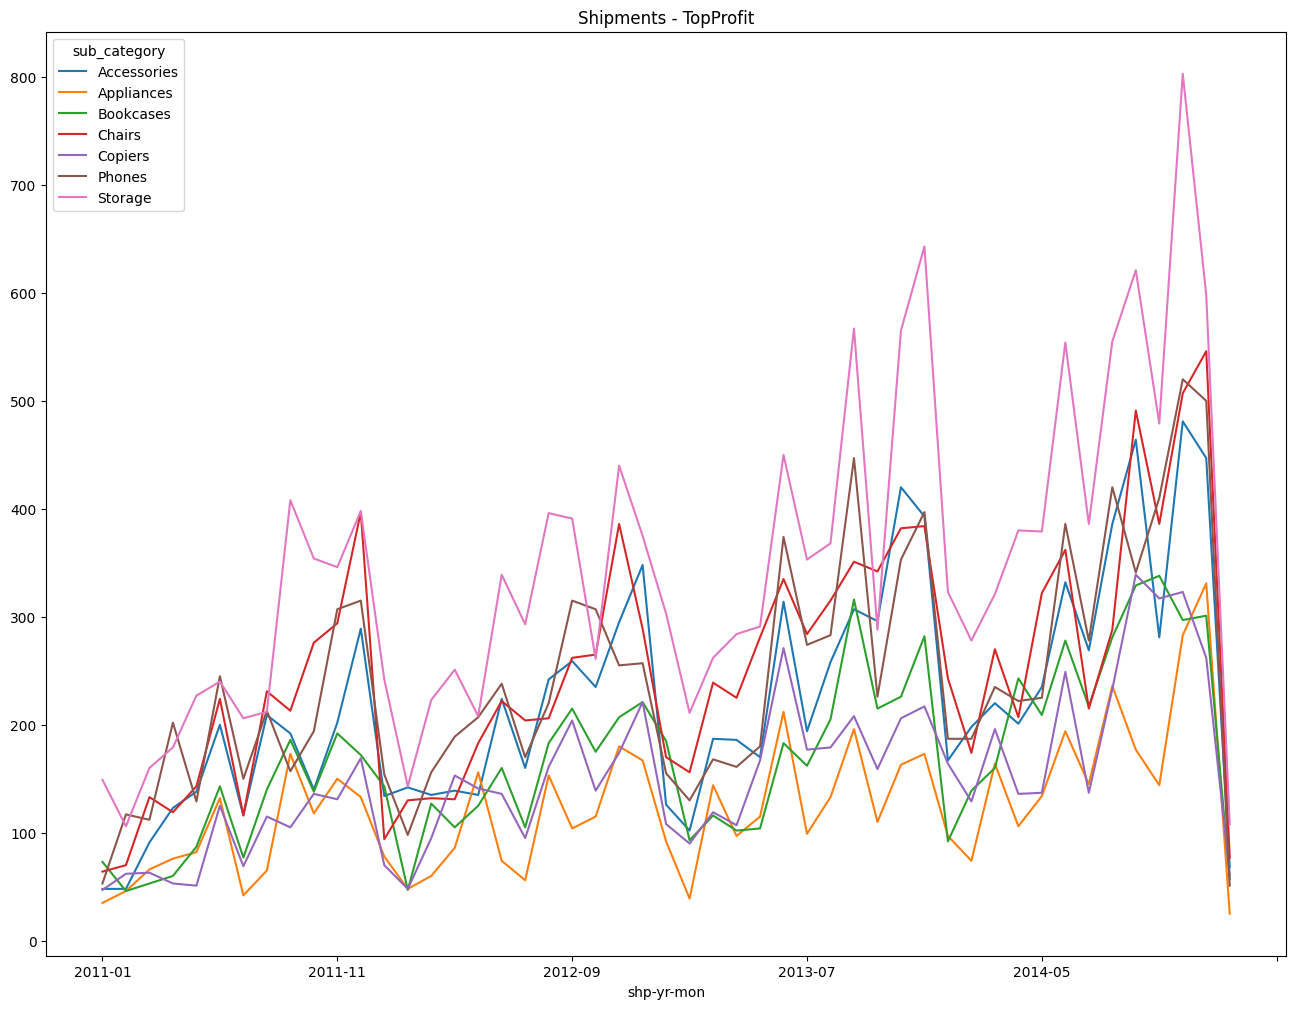

In [ ]:
pd.pivot_table(dfCopy[dfCopy['sub_category'] != 'Not80pcProfit'], index = 'shp-yr-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').\
plot(title = 'Shipments - TopProfit', figsize = (16,12));

In [ ]:
# Shipping data by month of year
#
dfCopy['shp-mon'] = pd.to_datetime(dfCopy['ship_date']).dt.strftime('%m')
#df_C6['shp-mon'].describe

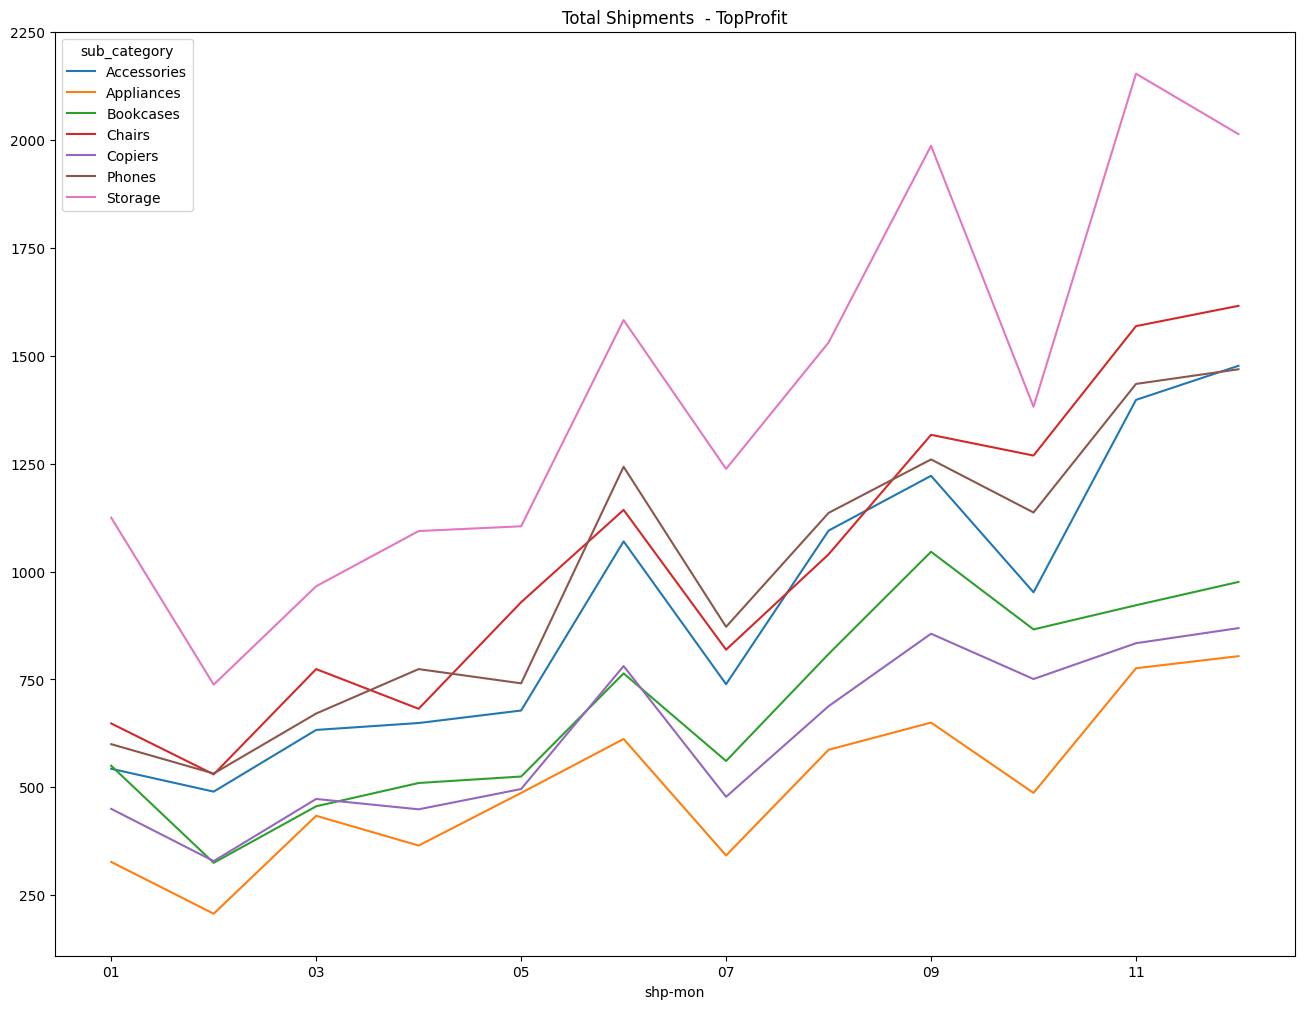

In [ ]:
pd.pivot_table(dfCopy[dfCopy['sub_category'] != 'Not80pcProfit'], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').\
plot(title = 'Total Shipments  - TopProfit', figsize = (16,12));

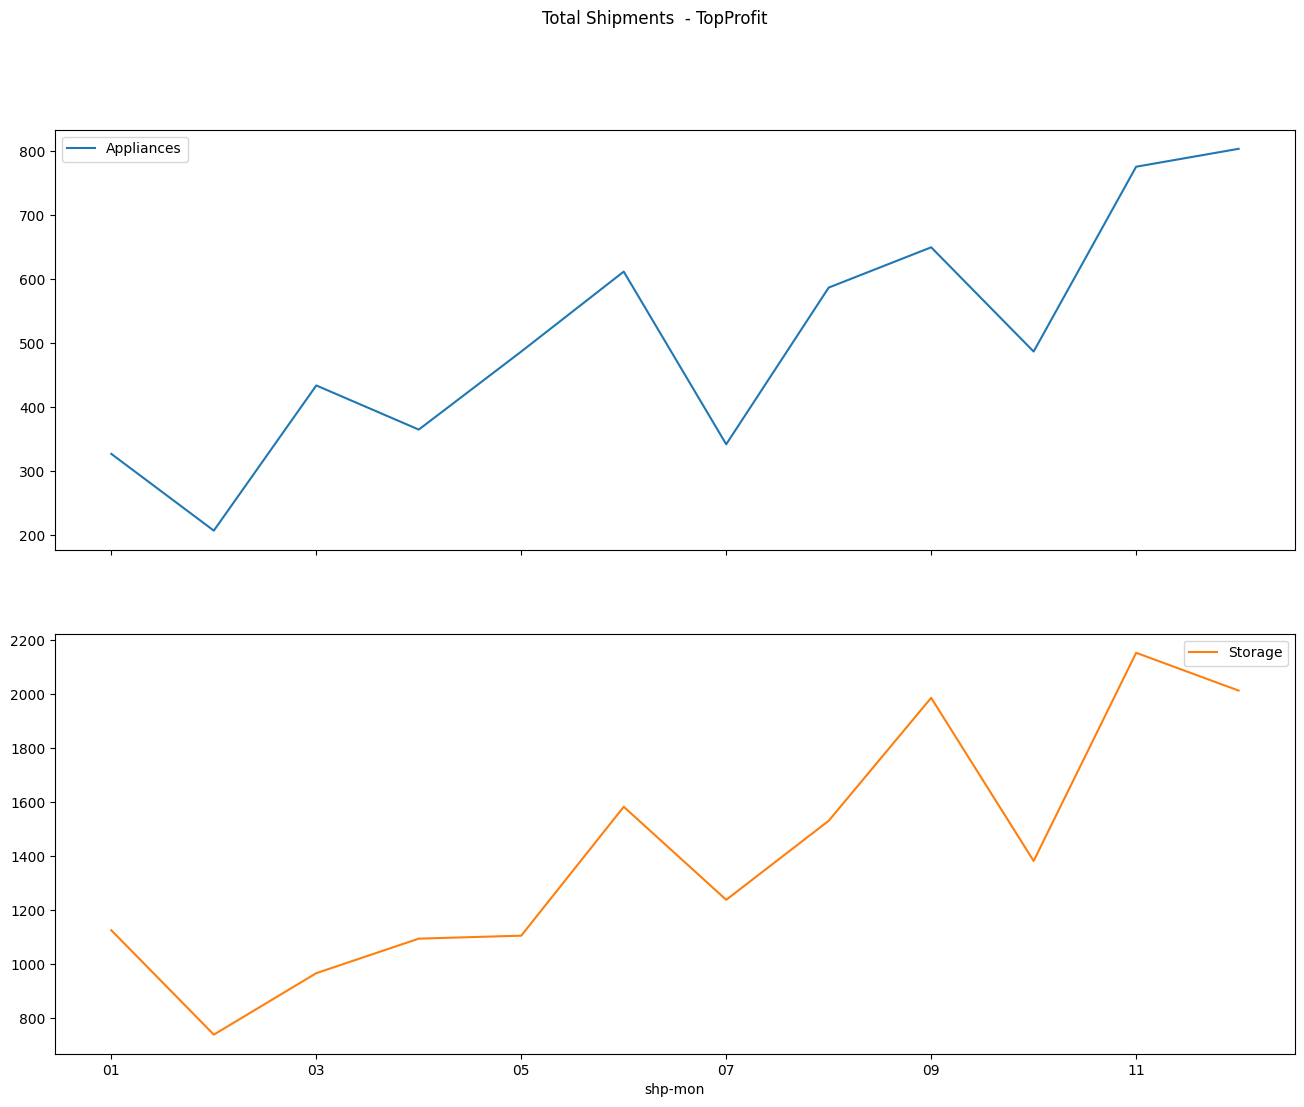

In [ ]:
# Focus on ONLY two sub_categories
#
SubCatOfInterest = ['Appliances','Storage']
pd.pivot_table(dfCopy[dfCopy['sub_category'] != 'Not80pcProfit'], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum')\
[SubCatOfInterest].\
plot(subplots=True,title = 'Total Shipments  - TopProfit', figsize = (16,12));

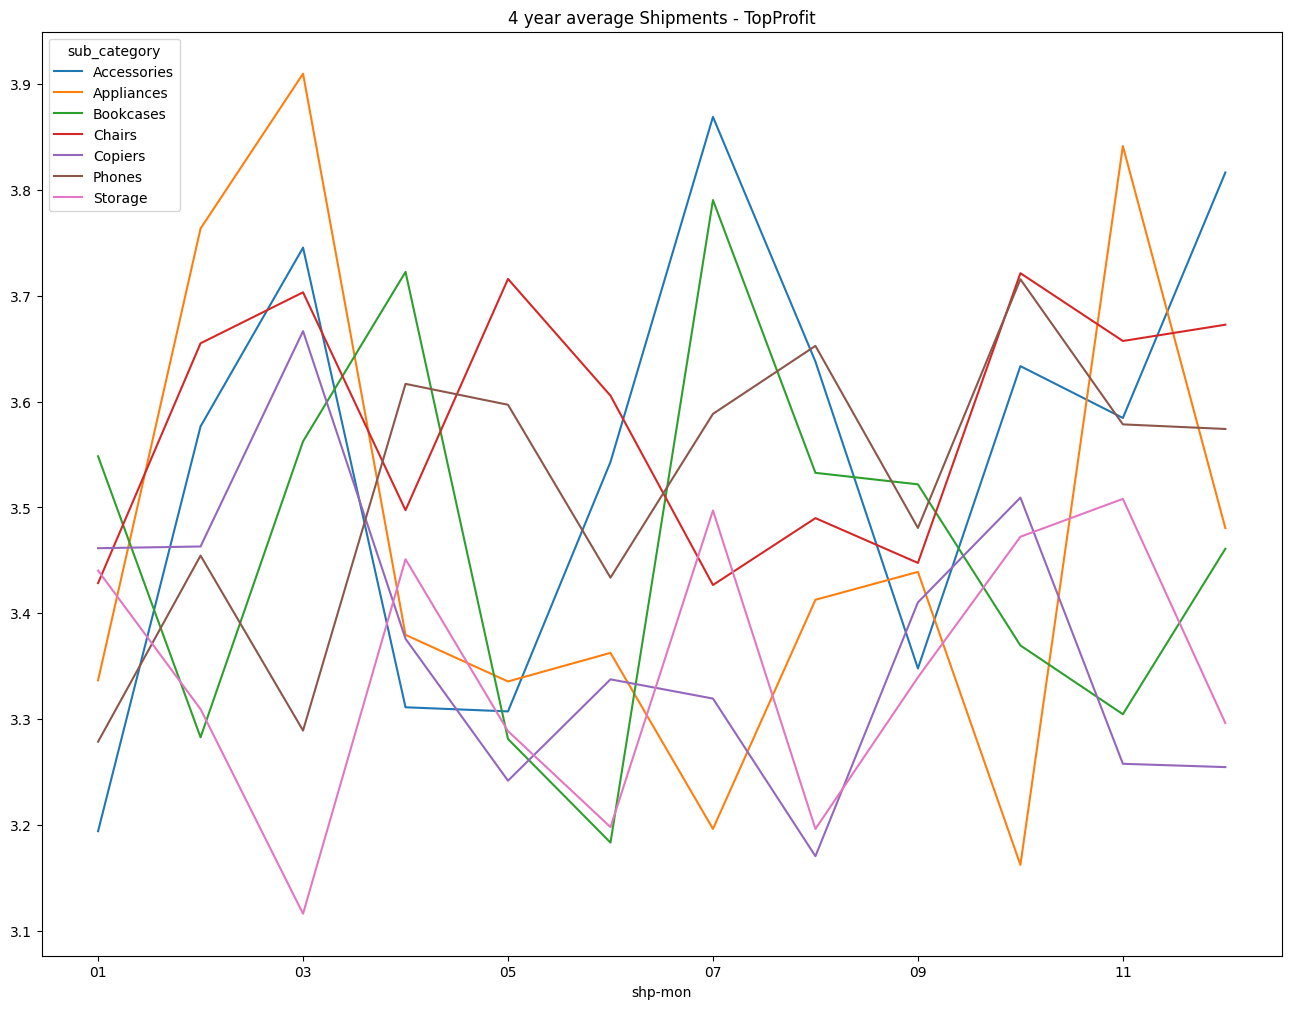

In [ ]:
# From total shipments, to average shipments
#
pd.pivot_table(dfCopy[dfCopy['sub_category'] != 'Not80pcProfit'], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'mean').\
plot(title = '4 year average Shipments - TopProfit', figsize = (16,12));

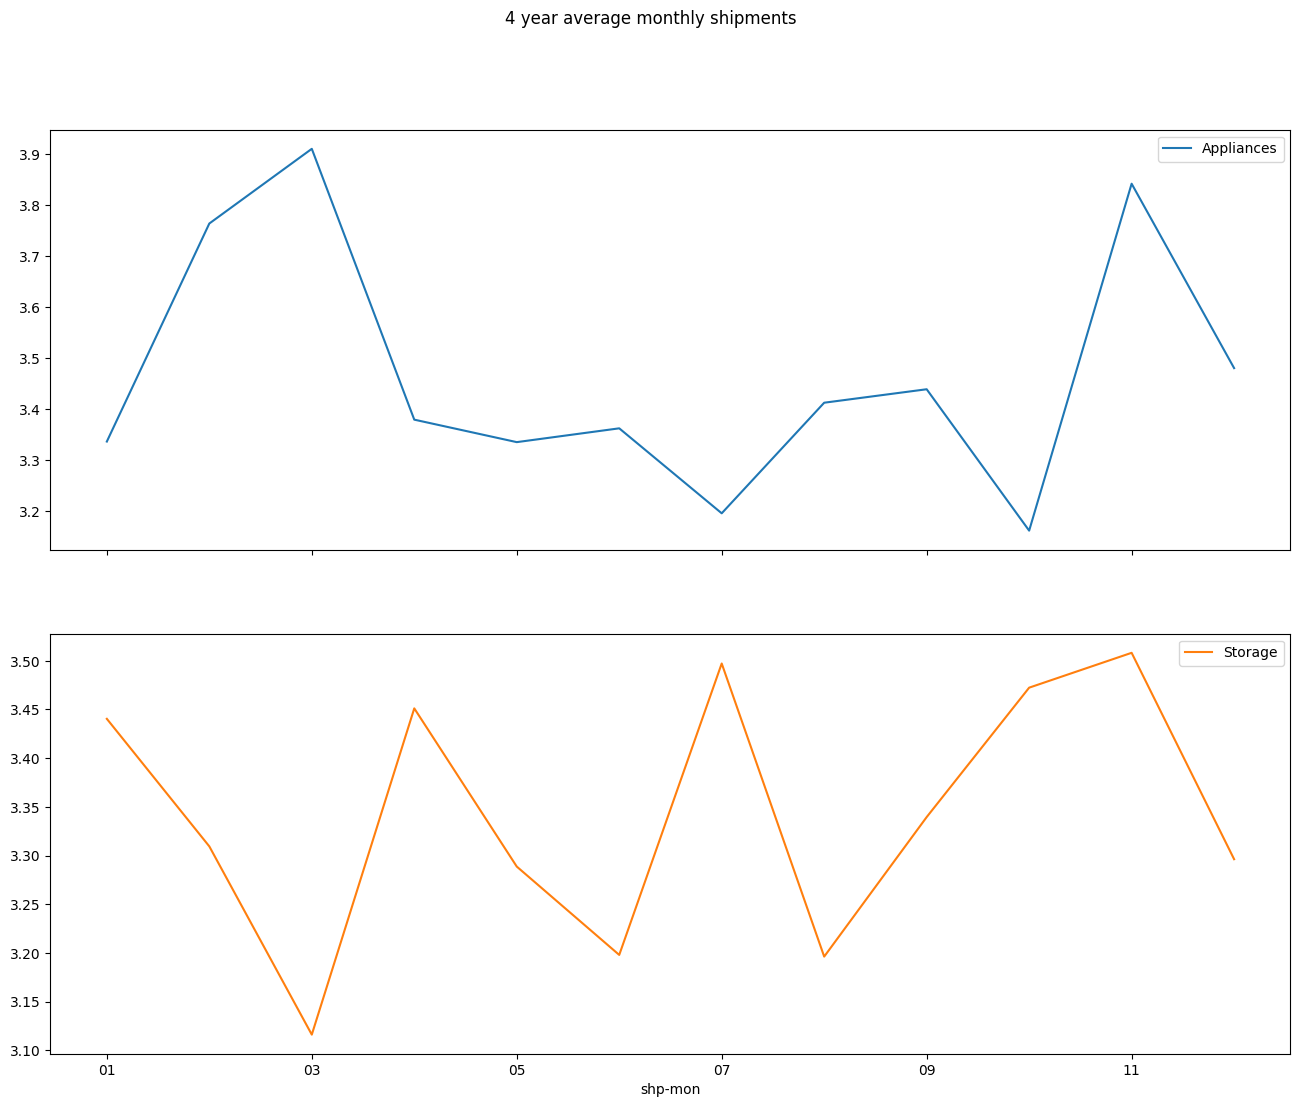

In [ ]:
# Average shipment of only two products over a month
#
SubCatOfInterest = ['Appliances','Storage']
pd.pivot_table(dfCopy[dfCopy['sub_category'] != 'Not80pcProfit'], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'mean')\
[SubCatOfInterest].\
plot(subplots=True,title = '4 year average monthly shipments', figsize = (16,12));

In [ ]:
# Now weekly shipment

#df['Week_Number'] = df['Date'].dt.isocalendar().week
dfCopy['shp-Week'] = pd.to_datetime(dfCopy['ship_date']).dt.isocalendar().week

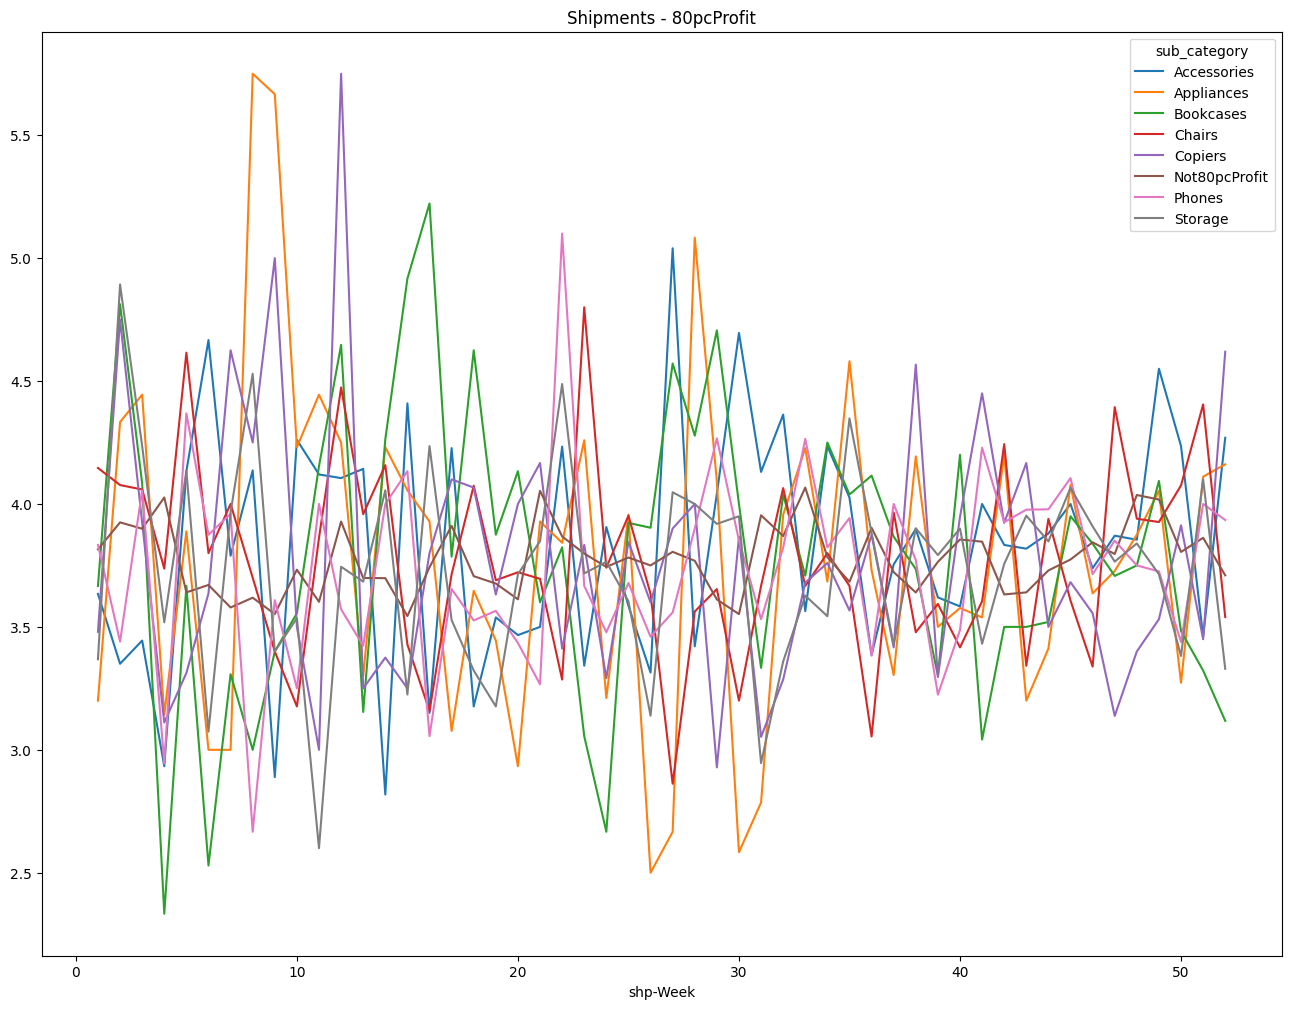

In [ ]:
pd.pivot_table(dfCopy[dfCopy['country'] != 'Not80pcProfit'], index = 'shp-Week', columns = 'sub_category', values = 'quantity', aggfunc = 'mean')\
.plot(title = 'Shipments - 80pcProfit', figsize = (16,12));

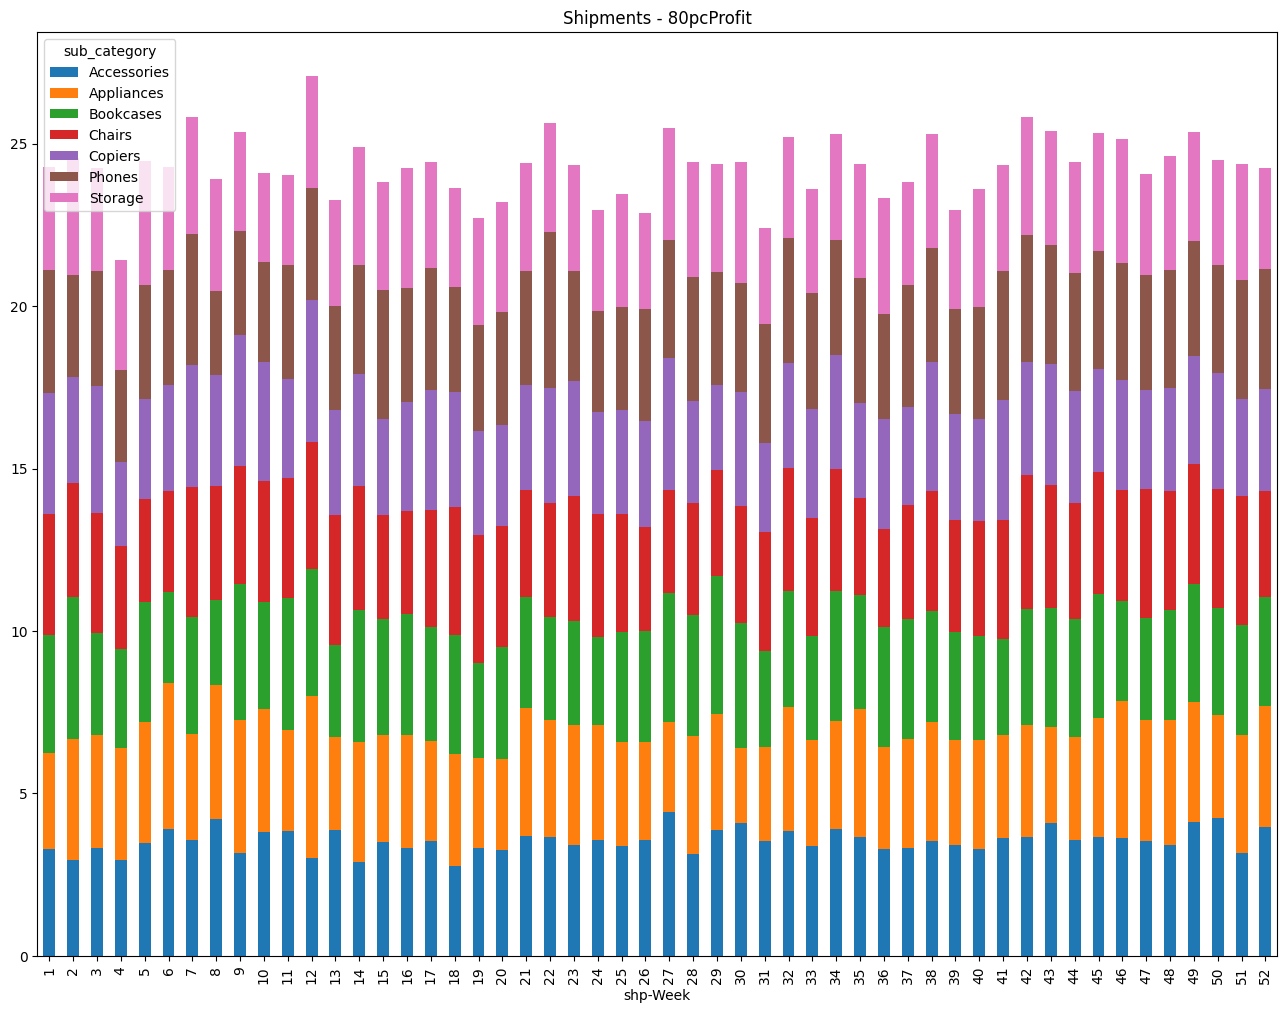

In [ ]:
pd.pivot_table(dfCopy[dfCopy['sub_category'] != 'Not80pcProfit'], index = 'shp-Week', columns = 'sub_category', values = 'quantity', aggfunc = 'mean')\
.plot(kind = 'bar', stacked=True,title = 'Shipments - 80pcProfit', figsize = (16,12));

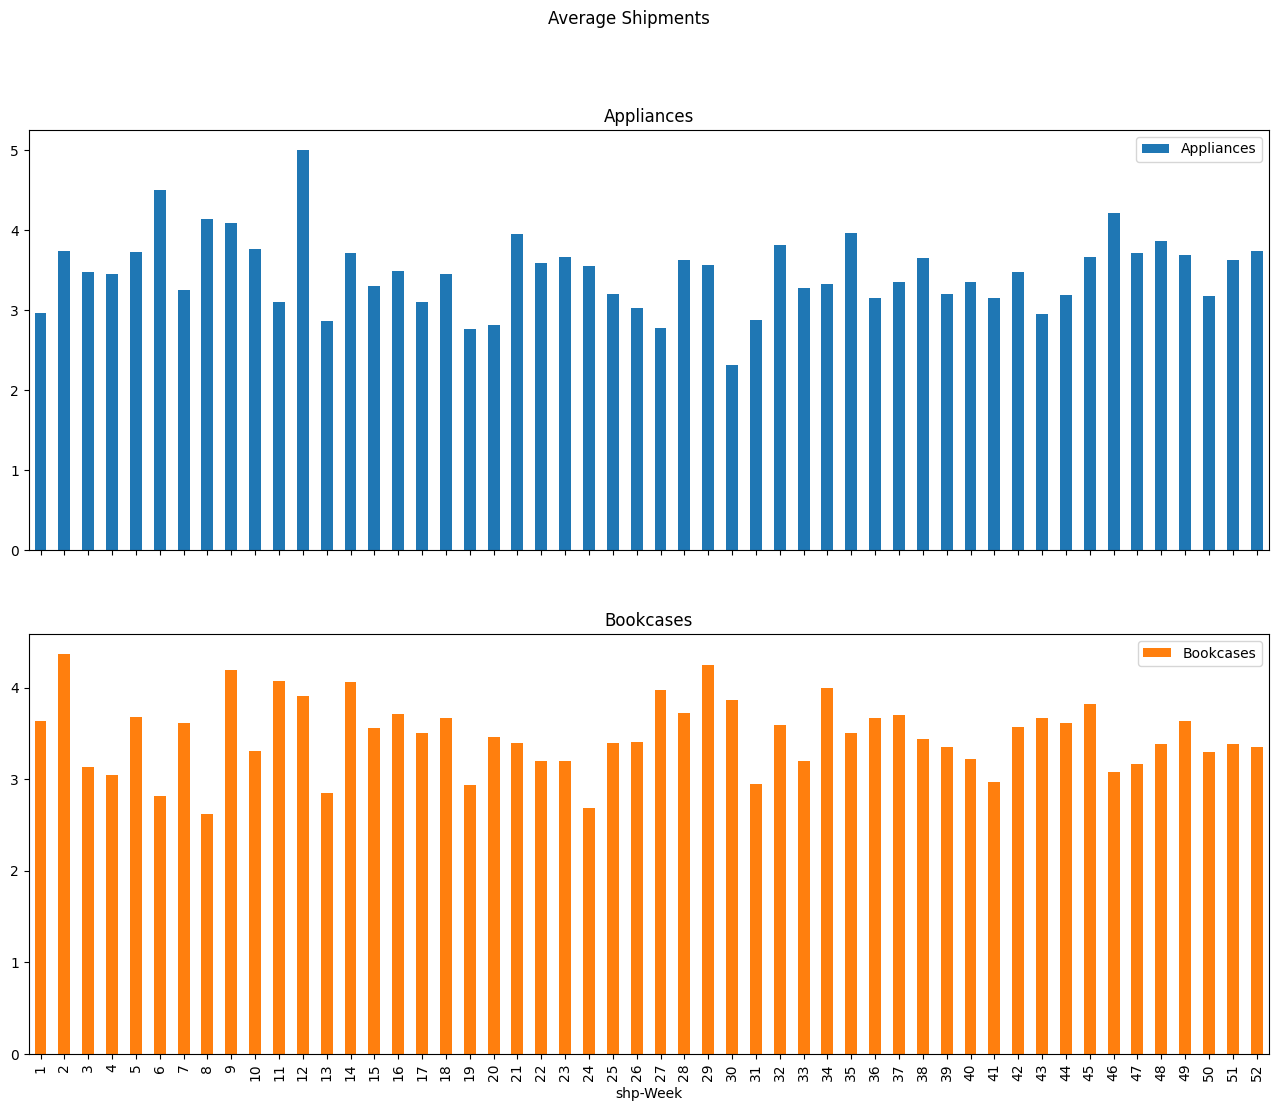

In [ ]:
pd.pivot_table(dfCopy[dfCopy['sub_category'].isin(['Appliances','Bookcases'])], index = 'shp-Week', columns = 'sub_category', values = 'quantity', aggfunc = 'mean')\
.plot(subplots=True, kind = 'bar',title = 'Average Shipments', figsize = (16,12));

#Additional Derived Facts
All facts are not directly available in the database but needs to be calculated ( or derived) from the data that is available

##Fulfillment Time
We need to find gap between order date and shipment date to determine how long it took for us to fulfill and order

In [ ]:
dfCopy = df.copy()
dfCopy.head(2)

,order_date,ship_date,ship_mode,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,2011-01-01,2011-01-06,Standard Class,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,2011-01-01,2011-01-08,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011


In [ ]:
print(list(dfCopy.columns))

['order_date', 'ship_date', 'ship_mode', 'segment', 'state', 'country', 'market', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'order_priority', 'year']


In [ ]:
dropColumns = [ 'segment', 'state', 'country',  'product_id', 'category',  'sales',  'discount', 'profit', 'shipping_cost']
dfCopy.drop(dropColumns, axis=1, inplace= True)
dfCopy.head(2)

,order_date,ship_date,ship_mode,market,region,sub_category,product_name,quantity,order_priority,year
0,2011-01-01,2011-01-06,Standard Class,Africa,Africa,Storage,"Tenex Lockers, Blue",2,Medium,2011
1,2011-01-01,2011-01-08,Standard Class,APAC,Oceania,Supplies,"Acme Trimmer, High Speed",3,Medium,2011


In [ ]:
#
# fulfill_days is number of dates between order and shipment
#
dfCopy['fulfill_days'] = (pd.to_datetime(dfCopy['ship_date']) - pd.to_datetime(dfCopy['order_date'])).dt.days
dfCopy.head(2)

,order_date,ship_date,ship_mode,market,region,sub_category,product_name,quantity,order_priority,year,fulfill_days
0,2011-01-01,2011-01-06,Standard Class,Africa,Africa,Storage,"Tenex Lockers, Blue",2,Medium,2011,5
1,2011-01-01,2011-01-08,Standard Class,APAC,Oceania,Supplies,"Acme Trimmer, High Speed",3,Medium,2011,7


In [ ]:
#df.groupby('region').sum()[Facts].sort_values('sales',axis=0, ascending= False).round(decimals = 2)
# Critical orders should be fulfilled in least time
# We see that this is what happens
#
dfCopy[['market','sub_category','fulfill_days','order_priority']].groupby('order_priority').mean(numeric_only=True)

,fulfill_days
order_priority,
Critical,1.806205
High,3.085801
Low,6.484736
Medium,4.516529


In [ ]:
#pd.pivot_table(dfCopy[dfCopy['sub_category'] != 'Not80pcProfit'], index = 'year', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').
pd.pivot_table(dfCopy[['market','sub_category','fulfill_days','order_priority']], index = 'sub_category', columns = 'order_priority', values = 'fulfill_days',aggfunc='mean')

order_priority,Critical,High,Low,Medium
sub_category,,,,
Accessories,1.885593,3.106557,6.419118,4.484076
Appliances,1.841463,3.014787,6.428571,4.529592
Art,1.763085,3.097345,6.549356,4.540099
Binders,1.802575,3.070922,6.450000,4.511962
Bookcases,1.763819,3.109244,6.534351,4.419166
Chairs,1.817427,3.043011,6.419540,4.543086
Copiers,1.763314,3.089153,6.495575,4.549685
Envelopes,1.738693,3.171896,6.554545,4.507538
Fasteners,1.763736,3.071823,6.503817,4.535069


## Discount analysis

In [ ]:
#df.head()
#df['discount'].describe()

In [ ]:
# We convert a numeric value of discount to a categorical value
# Note the bucket for None is negative to 0
#                     Low  is > 0 to 0.1, right side included
#                     Avg  is > 0.1 to 0.25
#                     High is > 0.25 to 0.99
#
dfCopy = df.copy()
dfCopy['discount_Level'] = pd.cut(dfCopy['discount'],[-0.001,0,0.1,0.25,0.99], right=True, labels = ['None',"Low", "Avg", "High"])
#
dfCopy.head()

,order_date,ship_date,ship_mode,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,discount_Level
0,2011-01-01,2011-01-06,Standard Class,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011,None
1,2011-01-01,2011-01-08,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011,Low
2,2011-01-01,2011-01-05,Second Class,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011,None
3,2011-01-01,2011-01-05,Second Class,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011,High
4,2011-01-01,2011-01-08,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011,Low


/tmp/ipython-input-739886307.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(dfCopy, index = 'sub_category', columns = 'discount_Level', values = 'quantity', aggfunc = 'count' ).\


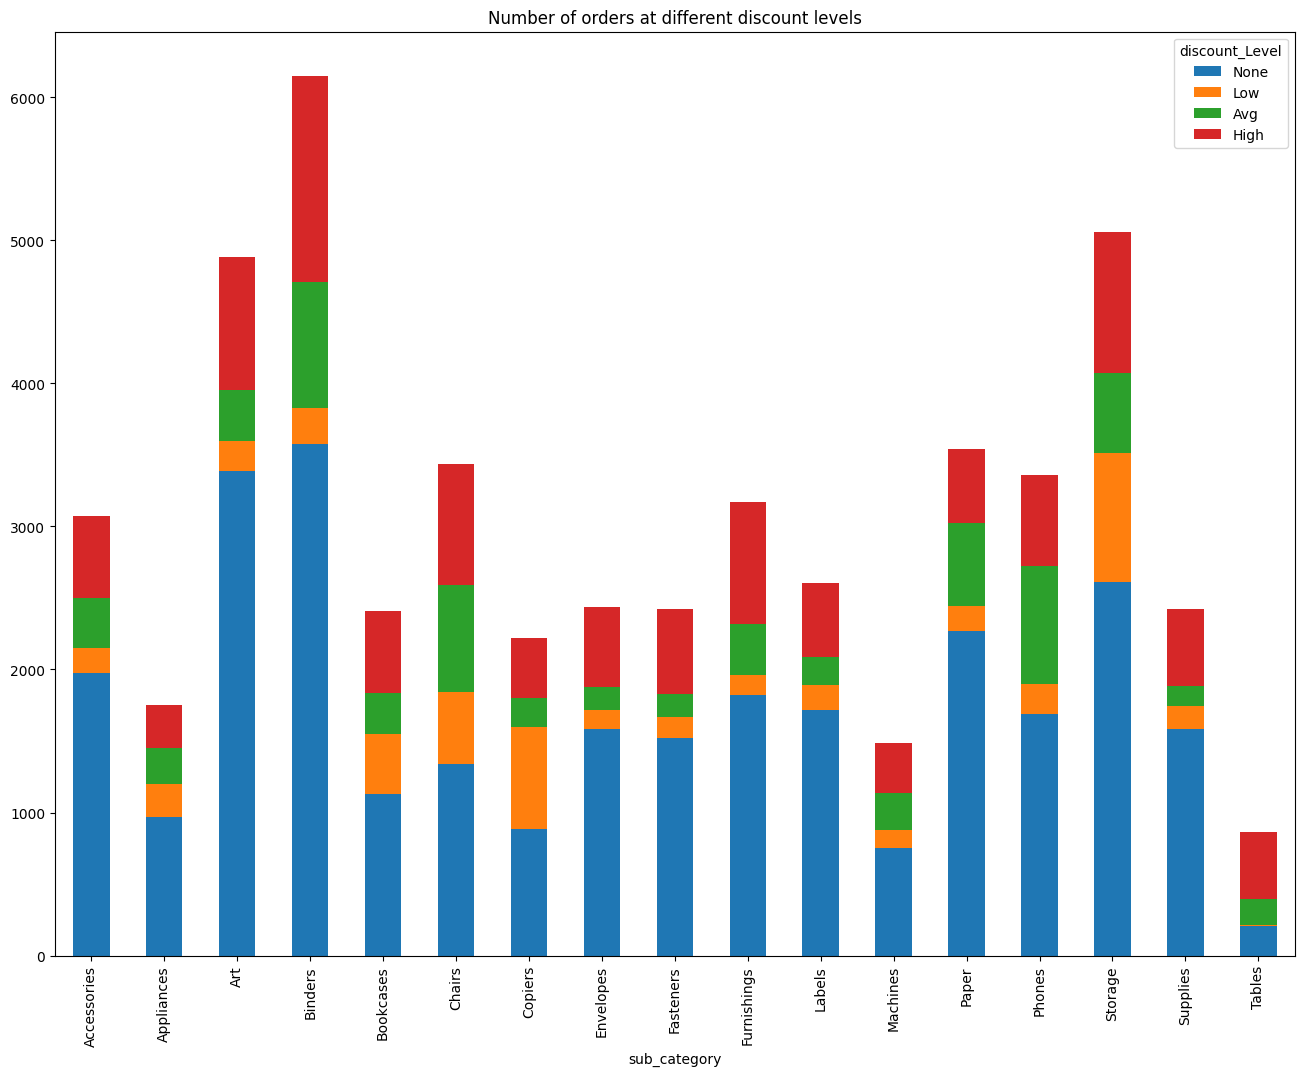

In [ ]:
pd.pivot_table(dfCopy, index = 'sub_category', columns = 'discount_Level', values = 'quantity', aggfunc = 'count' ).\
plot(kind = 'bar', stacked = True, figsize = (16,12), title = 'Number of orders at different discount levels');

/tmp/ipython-input-3118792521.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  dfDiscLevels = pd.pivot_table(dfCopy, index = 'sub_category', columns = 'discount_Level', values = 'quantity', aggfunc = 'count', margins=True )


<Axes: xlabel='sub_category'>

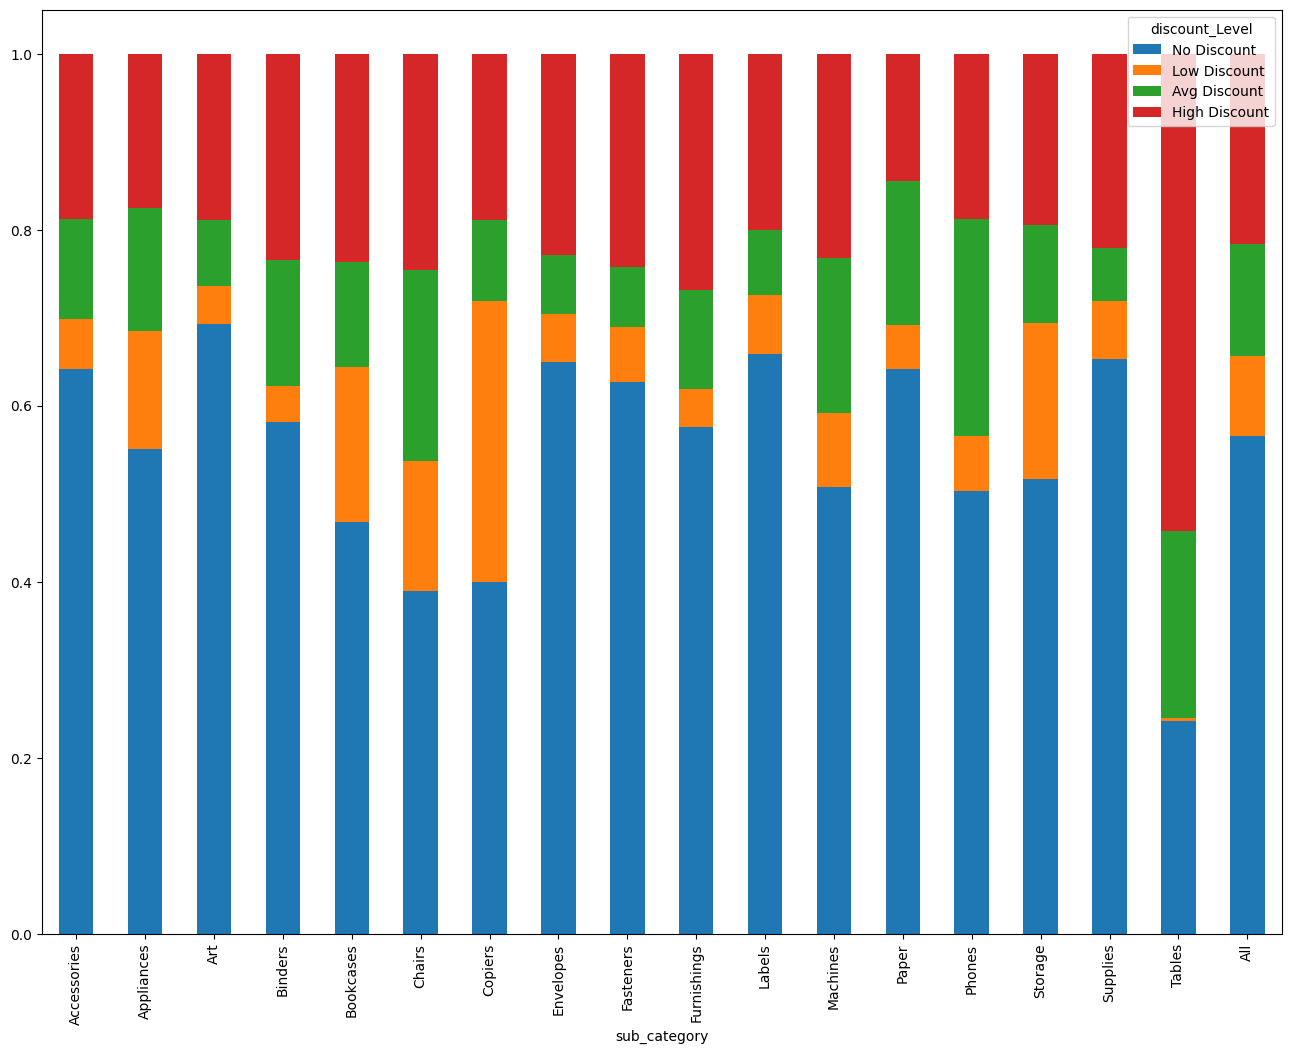

In [ ]:
dfDiscLevels = pd.pivot_table(dfCopy, index = 'sub_category', columns = 'discount_Level', values = 'quantity', aggfunc = 'count', margins=True )
#dfDiscLevels
dfDiscLevels['No Discount'] = dfDiscLevels['None']/dfDiscLevels['All']
dfDiscLevels['Low Discount'] = dfDiscLevels['Low']/dfDiscLevels['All']
dfDiscLevels['Avg Discount'] = dfDiscLevels['Avg']/dfDiscLevels['All']
dfDiscLevels['High Discount'] = dfDiscLevels['High']/dfDiscLevels['All']
dfDiscLevels[['No Discount','Low Discount','Avg Discount','High Discount']].plot(kind = 'bar', stacked = True, figsize = (16,12))

In [ ]:
pd.to_datetime("today").strftime("%d %B %Y")      # get today's date and format it as required

'29 October 2025'

#ChronoTYM <br>
In Indic phraseology, tantra is knowledge, a yantra is a device to explore this knowledge and a mantra is the code that unlocks both the tantra and its yantra. Chrono/TYM a sci-fi trilogy that recreates this framework where the first novel Chronotantra defines the contours of a tech driven, futuristic society, the second, Chronoyantra, describes a device used to explore the genesis of this society, while the third, Chronomantra finally reveals the code, the key, that unlocks this puzzle.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjdu_ajYwBRzk5iFYlcs59ZoRMMg6rhNm4JERKspvFJoveJsnfwRlzMICiC37UOja_Bd4sbfLA1pyyBbe0mj3tUfDBXoqCzNUDw3Wux7acoJBaLkWjAvJXfa7drRY2GQRAlFxEY9O7a7raY4RKy7cA3Uxgf5QsaZQ99C9GfXxFSex_rke8ROhAn41t8zOqK/s1640/tymBanner01_3.png)

# Task <br>
Perform additional analysis on this dataset